# 공공데이터 상권정보 분석해 보기
- https://www.data.go.kr/dataset/15012005/fileData.do
- 국가중점데이터인 상권정보를 살펴봅니다.

## 필요한 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np #수치계산
import seaborn as sns #시각화

%matplotlib inline

## 시각화를 위한 폰트 설정

In [2]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
# Window 의 한글 폰트 설정
plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
# plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)

# 폰트가 선명하게 보이기 위해 - 그래프에 retina display 적용
# retina 대신 svg 등의 설정을 할 수도 있으며 
# 디스플레이(모니터)가 retina 를 지원해야만 선명한 차이를 볼 수 있습니다.
%config InlineBackend.figure_format = 'retina'

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

## 데이터 로드하기

In [3]:
df = pd.read_csv('../dataset/소상공인시장진흥공단_상가업소정보_의료기관_201909.csv', encoding='cp949', low_memory=False)
df.shape

(91335, 39)

## 데이터 미리보기
- head, tail 

In [4]:
df.head(1)

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
0  19956873  하나산부인과  NaN         S       의료       S01       병원    S01B10   

  상권업종소분류명 표준산업분류코드  ...        건물관리번호      건물명               도로명주소     구우편번호  \
0     산부인과   Q86201  ...  4.130000e+24  산호한양아파트  경기도 안산시 단원구 달미로 10  425764.0   

     신우편번호  동정보 층정보  호정보          경도         위도  
0  15236.0  NaN NaN  NaN  126.814295  37.336344  

[1 rows x 39 columns]

In [5]:
df.tail(1)

상가업소번호           상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
91334  16109073  천안김안과천안역본점의원  NaN         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명 표준산업분류코드  ...        건물관리번호  건물명  \
91334    S01B13     안과의원   Q86201  ...  4.410000e+24  김안과   

                     도로명주소     구우편번호    신우편번호  동정보 층정보  호정보          경도  \
91334  충청남도 천안시 동남구 중앙로 92  330952.0  31127.0  NaN NaN  NaN  127.152651   

             위도  
91334  36.80664  

[1 rows x 39 columns]

In [6]:
df.sample()

상가업소번호     상호명  지점명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
47487  24706081  탄현동물병원  NaN         S       의료       S04      수의업    S04A01   

      상권업종소분류명 표준산업분류코드  ...        건물관리번호  건물명                  도로명주소  \
47487   수의업-종합   M73100  ...  4.150000e+24  NaN  경기도 파주시 탄현면 방촌로 663-9   

          구우편번호    신우편번호  동정보 층정보  호정보          경도         위도  
47487  413843.0  10858.0  NaN NaN  NaN  126.717894  37.803572  

[1 rows x 39 columns]

## 데이터 요약하기 

In [7]:
df.info()
# columns의 갯수가 차이가 난다는 것은 결측치가 있다는 뜻

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91335 entries, 0 to 91334
Data columns (total 39 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   상가업소번호     91335 non-null  int64  
 1   상호명        91335 non-null  object 
 2   지점명        1346 non-null   object 
 3   상권업종대분류코드  91335 non-null  object 
 4   상권업종대분류명   91335 non-null  object 
 5   상권업종중분류코드  91335 non-null  object 
 6   상권업종중분류명   91335 non-null  object 
 7   상권업종소분류코드  91335 non-null  object 
 8   상권업종소분류명   91335 non-null  object 
 9   표준산업분류코드   86413 non-null  object 
 10  표준산업분류명    86413 non-null  object 
 11  시도코드       90956 non-null  float64
 12  시도명        90956 non-null  object 
 13  시군구코드      90956 non-null  float64
 14  시군구명       90956 non-null  object 
 15  행정동코드      91335 non-null  int64  
 16  행정동명       90956 non-null  object 
 17  법정동코드      91280 non-null  float64
 18  법정동명       91280 non-null  object 
 19  지번코드       91335 non-null  float64
 20  대지구분코드

In [8]:
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [9]:
df.dtypes

상가업소번호         int64
상호명           object
지점명           object
상권업종대분류코드     object
상권업종대분류명      object
상권업종중분류코드     object
상권업종중분류명      object
상권업종소분류코드     object
상권업종소분류명      object
표준산업분류코드      object
표준산업분류명       object
시도코드         float64
시도명           object
시군구코드        float64
시군구명          object
행정동코드          int64
행정동명          object
법정동코드        float64
법정동명          object
지번코드         float64
대지구분코드         int64
대지구분명         object
지번본번지          int64
지번부번지        float64
지번주소          object
도로명코드        float64
도로명           object
건물본번지          int64
건물부번지        float64
건물관리번호       float64
건물명           object
도로명주소         object
구우편번호        float64
신우편번호        float64
동정보           object
층정보          float64
호정보          float64
경도           float64
위도           float64
dtype: object

## 결측치

In [10]:
df.isnull().sum()

상가업소번호           0
상호명              0
지점명          89989
상권업종대분류코드        0
상권업종대분류명         0
상권업종중분류코드        0
상권업종중분류명         0
상권업종소분류코드        0
상권업종소분류명         0
표준산업분류코드      4922
표준산업분류명       4922
시도코드           379
시도명            379
시군구코드          379
시군구명           379
행정동코드            0
행정동명           379
법정동코드           55
법정동명            55
지번코드             0
대지구분코드           0
대지구분명            0
지번본번지            0
지번부번지        19256
지번주소             0
도로명코드            0
도로명              0
건물본번지            0
건물부번지        80731
건물관리번호           0
건물명          44882
도로명주소            0
구우편번호           12
신우편번호            2
동정보          83929
층정보          47346
호정보          75898
경도               0
위도               0
dtype: int64

<Axes: >

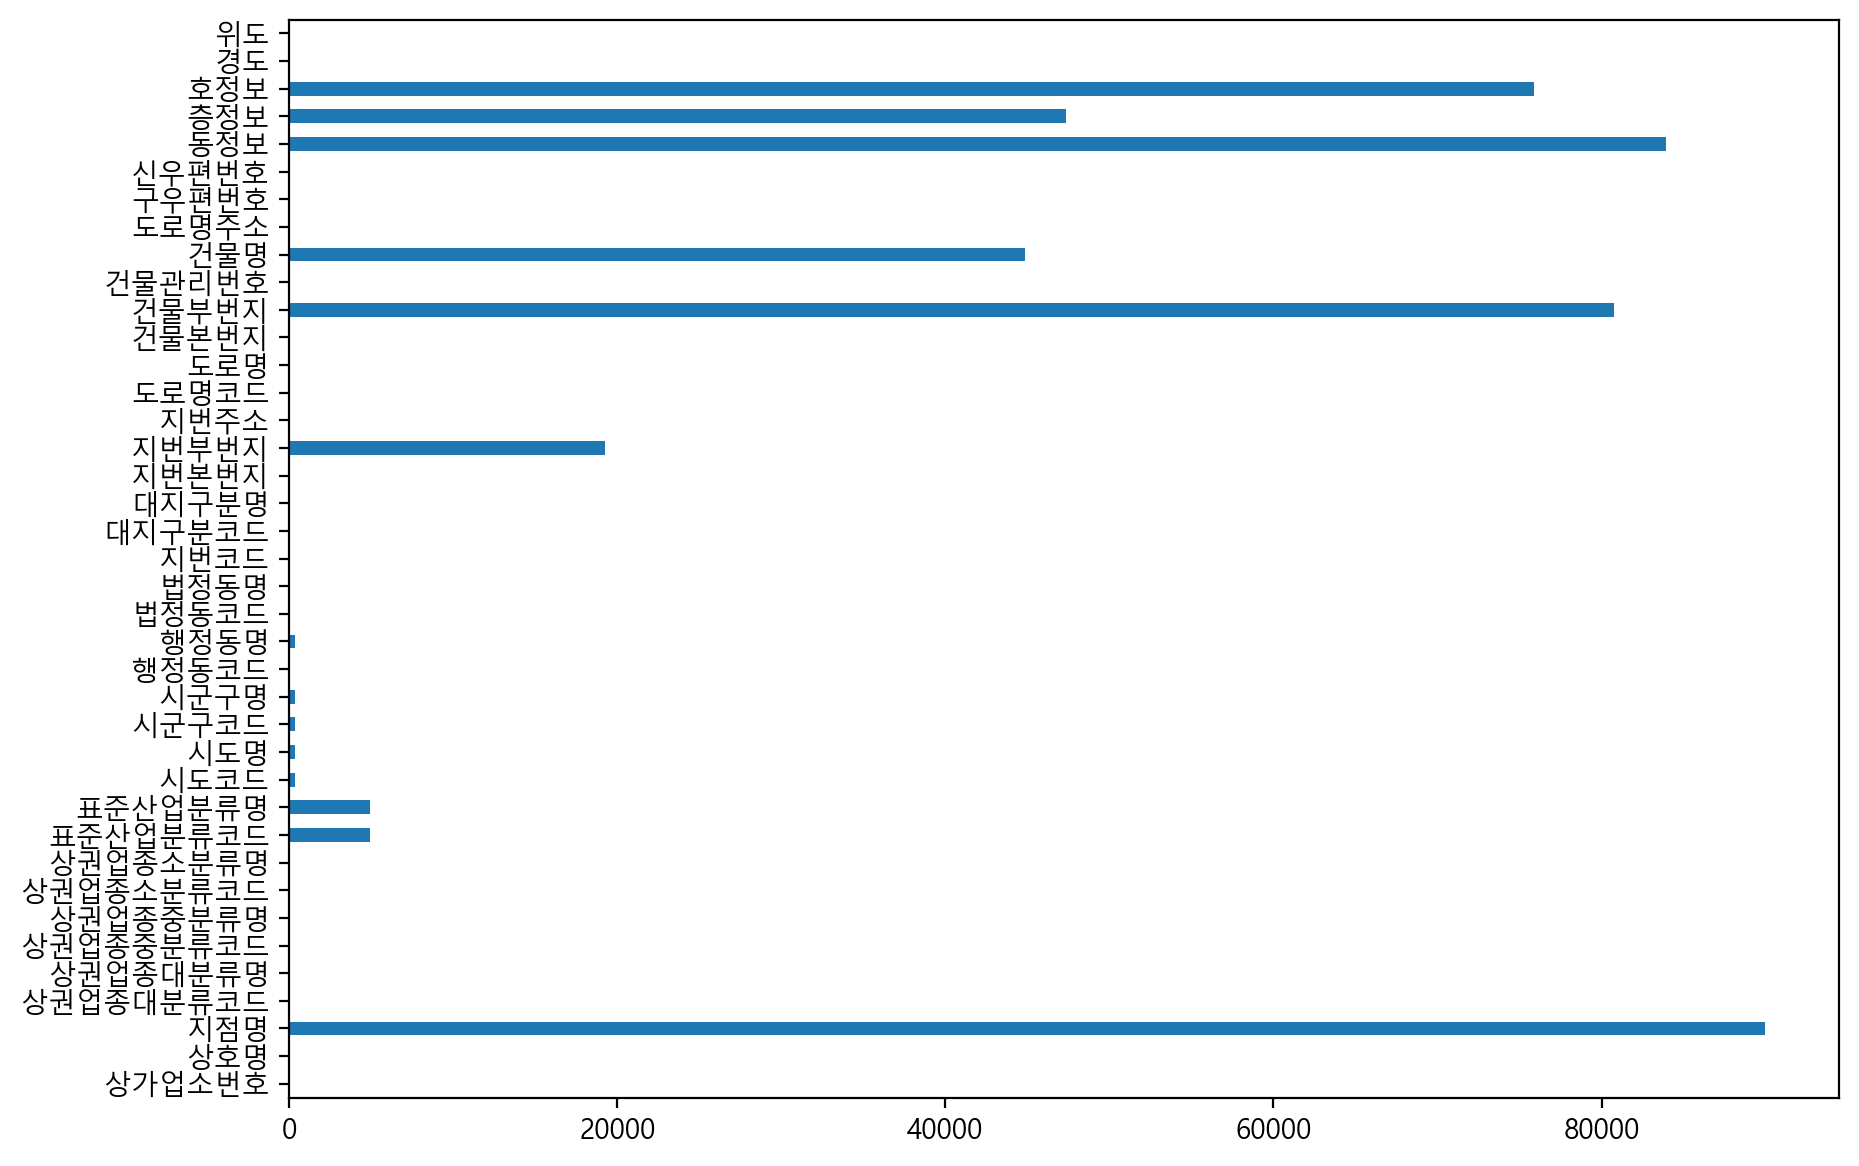

In [11]:
# 위에서 구한 결측치를 .plot.bar 를 통해 막대그래프로 표현합니다. 
# h 축을 변경
df.isnull().sum().plot.barh(figsize=(10, 7))


In [12]:
# 위에서 계산한 결측치 수를 reset_index 를 통해 데이터프레임으로 만들어 줍니다.
# df_null_count 변수에 결과를 담아서 head 로 미리보기를 합니다.
df_null_count = df.isnull().sum().reset_index()
df_null_count.head()

index      0
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

### 컬럼명 변경하기

In [13]:
df_null_count.columns = ["컬럼명", "결측치수"]
df_null_count.head()

컬럼명   결측치수
0     상가업소번호      0
1        상호명      0
2        지점명  89989
3  상권업종대분류코드      0
4   상권업종대분류명      0

### 정렬하기 

In [14]:
df_null_count.sort_values(by="결측치수", ascending=False)

컬럼명   결측치수
2         지점명  89989
34        동정보  83929
28      건물부번지  80731
36        호정보  75898
35        층정보  47346
30        건물명  44882
23      지번부번지  19256
9    표준산업분류코드   4922
10    표준산업분류명   4922
11       시도코드    379
13      시군구코드    379
14       시군구명    379
16       행정동명    379
12        시도명    379
17      법정동코드     55
18       법정동명     55
32      구우편번호     12
33      신우편번호      2
29     건물관리번호      0
27      건물본번지      0
0      상가업소번호      0
31      도로명주소      0
25      도로명코드      0
37         경도      0
26        도로명      0
19       지번코드      0
24       지번주소      0
22      지번본번지      0
21      대지구분명      0
20     대지구분코드      0
1         상호명      0
15      행정동코드      0
8    상권업종소분류명      0
7   상권업종소분류코드      0
6    상권업종중분류명      0
5   상권업종중분류코드      0
4    상권업종대분류명      0
3   상권업종대분류코드      0
38         위도      0

In [15]:
# 결측치가 많은 순으로 상위 10개만 출력합니다.
df_null_count_top = df_null_count.sort_values(
    by="결측치수", ascending=False).head(10)
df_null_count_top

컬럼명   결측치수
2        지점명  89989
34       동정보  83929
28     건물부번지  80731
36       호정보  75898
35       층정보  47346
30       건물명  44882
23     지번부번지  19256
9   표준산업분류코드   4922
10   표준산업분류명   4922
11      시도코드    379

### 특정 컬럼만 불러오기

In [16]:
df["지점명"].head(1)

0    NaN
Name: 지점명, dtype: object

In [17]:
drop_columns = df_null_count_top["컬럼명"].tolist()
drop_columns

['지점명',
 '동정보',
 '건물부번지',
 '호정보',
 '층정보',
 '건물명',
 '지번부번지',
 '표준산업분류코드',
 '표준산업분류명',
 '시도코드']

In [18]:
# drop_columns = df_null_head["컬럼명"].values

In [19]:
# drop_columns 변수로 해당 컬럼 정보만 데이터프레임에서 가져옵니다.
df[drop_columns].head()

지점명  동정보  건물부번지  호정보  층정보      건물명  지번부번지 표준산업분류코드         표준산업분류명  시도코드
0  NaN  NaN    NaN  NaN  NaN  산호한양아파트    NaN   Q86201           일반 의원  41.0
1  NaN  NaN    NaN  NaN  4.0      NaN   14.0   Q86201           일반 의원  11.0
2  NaN  NaN    NaN  NaN  NaN    한라프라자    1.0   Q86201           일반 의원  41.0
3  NaN  NaN    NaN  NaN  5.0      NaN    1.0      NaN             NaN  26.0
4  수지점  NaN    NaN  NaN  1.0      NaN    2.0   G47811  의약품 및 의료용품 소매업  41.0

### 제거하기

In [20]:
print(df.shape)
df = df.drop(drop_columns, axis=1) #0 = 행기준, 1= 열기준 
print(df.shape)

# 결과 : 39개였던 열이 29개가 되었음

(91335, 39)
(91335, 29)


## 기초 통계값 보기

In [21]:
# 평균값
df["위도"].mean()

36.62471119236065

In [22]:
# 중앙값
df["위도"].median()

37.23465232

In [23]:
# 최댓값
df["위도"].max()

38.49965857

In [24]:
# 최솟값
df["위도"].min()

33.21928967

In [25]:
# 개수
df["위도"].count()

91335

## 기초통계값 요약하기 - describe

In [26]:
df["위도"].describe()

count    91335.000000
mean        36.624711
std          1.041361
min         33.219290
25%         35.811830
50%         37.234652
75%         37.507463
max         38.499659
Name: 위도, dtype: float64

In [27]:
df[["위도", "경도"]].describe()

위도            경도
count  91335.000000  91335.000000
mean      36.624711    127.487524
std        1.041361      0.842877
min       33.219290    124.717632
25%       35.811830    126.914297
50%       37.234652    127.084551
75%       37.507463    128.108919
max       38.499659    130.909912

In [28]:
# 문자열 데이터타입의 요약
df.describe(include="object") 

상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명    시도명  \
count   91335     91335    91335     91335    91335     91335    91335  90956   
unique  56908         1        1         5        5        34       34     17   
top        리원         S       의료       S01       병원    S02A01       약국    경기도   
freq      152     91335    91335     60774    60774     18964    18964  21374   

         시군구명   행정동명   법정동명  대지구분명                  지번주소             도로명  \
count   90956  90956  91280  91335                 91335           91335   
unique    228   2791   2822      2                 53118           16610   
top        서구    중앙동     중동     대지  서울특별시 동대문구 제기동 965-1  서울특별시 강남구 강남대로   
freq     3165   1856    874  91213                   198             326   

                        도로명주소  
count                   91335  
unique                  54031  
top     서울특별시 동대문구 약령중앙로8길 10  
freq                      198

## 중복제거한 값 보기 
- unique 로 중복을 제거한 값을 보고 nunique 로 갯수를 셈

In [29]:
df["상권업종대분류명"].unique()

array(['의료'], dtype=object)

In [30]:
df["상권업종대분류명"].nunique()

1

In [31]:
df["상권업종중분류명"].unique()

array(['병원', '약국/한약방', '수의업', '유사의료업', '의료관련서비스업'], dtype=object)

In [32]:
df["상권업종중분류명"].nunique()

5

In [33]:
df["상권업종소분류명"].unique()

array(['산부인과', '내과/외과', '신경외과', '기타병원', '약국', '동물병원', '한약방', '탕제원',
       '정형/성형외과', '소아과', '이비인후과의원', '노인/치매병원', '언어치료', '수의업-종합', '한의원',
       '치과의원', '침구원', '일반병원', '안과의원', '조산원', '한방병원', '종합병원', '유사의료업기타',
       '응급구조대', '혈액원', '치과병원', '척추교정치료', '피부과', '비뇨기과', '치과기공소', '산후조리원',
       '접골원', '수의업-기타', '제대혈'], dtype=object)

In [34]:
df["상권업종소분류명"].nunique()

34

In [35]:
# nunique 대신 len 을 사용 가능
len(df["상권업종소분류명"].unique())

34

## 그룹화된 요약값 보기 - value_counts
- value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 셈

In [36]:
df[:1]

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
0  19956873  하나산부인과         S       의료       S01       병원    S01B10     산부인과   

   시도명    시군구코드  ...                  지번주소         도로명코드              도로명  \
0  경기도  41273.0  ...  경기도 안산시 단원구 선부동 1081  4.130000e+11  경기도 안산시 단원구 달미로   

   건물본번지        건물관리번호               도로명주소     구우편번호    신우편번호          경도  \
0     10  4.130000e+24  경기도 안산시 단원구 달미로 10  425764.0  15236.0  126.814295   

          위도  
0  37.336344  

[1 rows x 29 columns]

In [37]:
df["시도명"].value_counts()

시도명
경기도        21374
서울특별시      18943
부산광역시       6473
경상남도        4973
인천광역시       4722
대구광역시       4597
경상북도        4141
전라북도        3894
충청남도        3578
전라남도        3224
광주광역시       3214
대전광역시       3067
충청북도        2677
강원도         2634
울산광역시       1997
제주특별자치도     1095
세종특별자치시      353
Name: count, dtype: int64

In [38]:
# normalize=True 는 비율
city_normalize = df["시도명"].value_counts(normalize=True)
city_normalize

시도명
경기도        0.234993
서울특별시      0.208266
부산광역시      0.071166
경상남도       0.054675
인천광역시      0.051915
대구광역시      0.050541
경상북도       0.045528
전라북도       0.042812
충청남도       0.039338
전라남도       0.035446
광주광역시      0.035336
대전광역시      0.033720
충청북도       0.029432
강원도        0.028959
울산광역시      0.021956
제주특별자치도    0.012039
세종특별자치시    0.003881
Name: proportion, dtype: float64

## 시각화

<Axes: ylabel='시도명'>

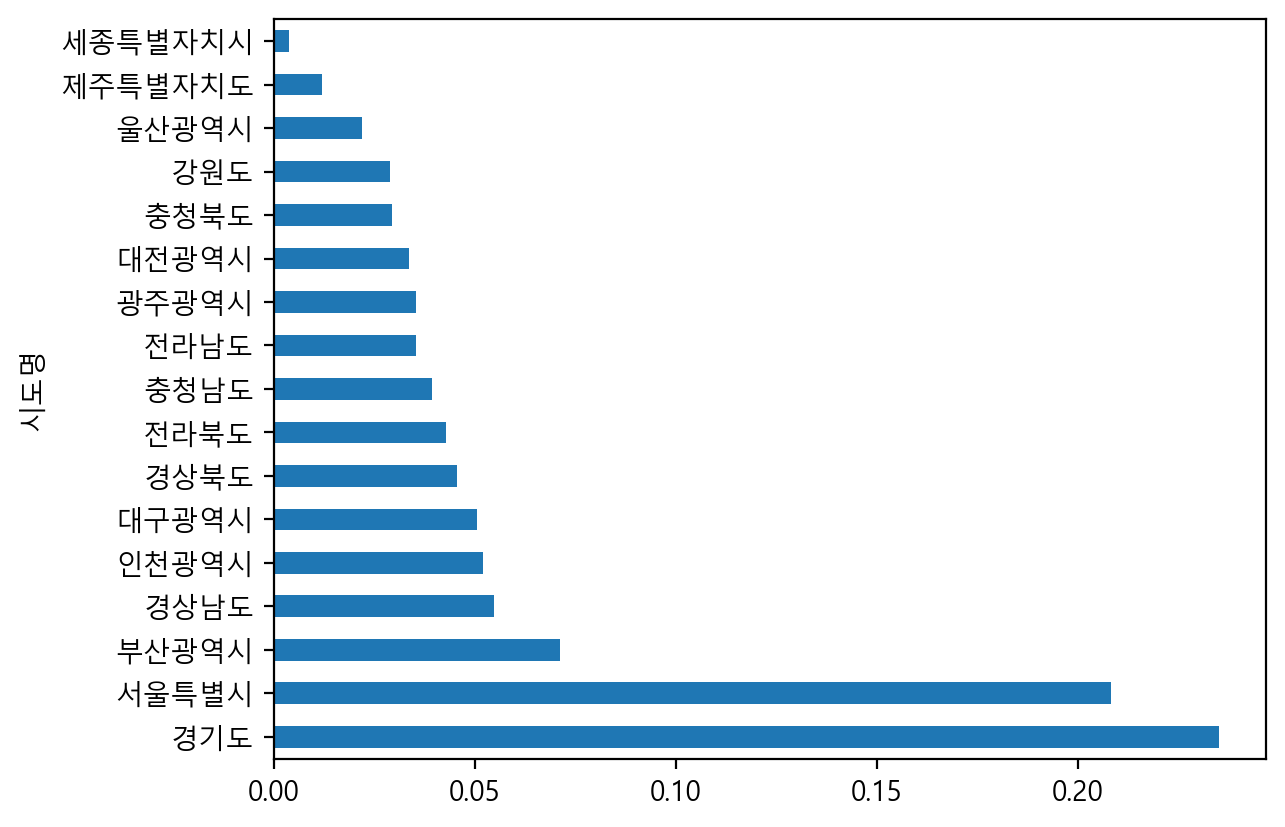

In [39]:
city_normalize.plot.barh()

<Axes: ylabel='proportion'>

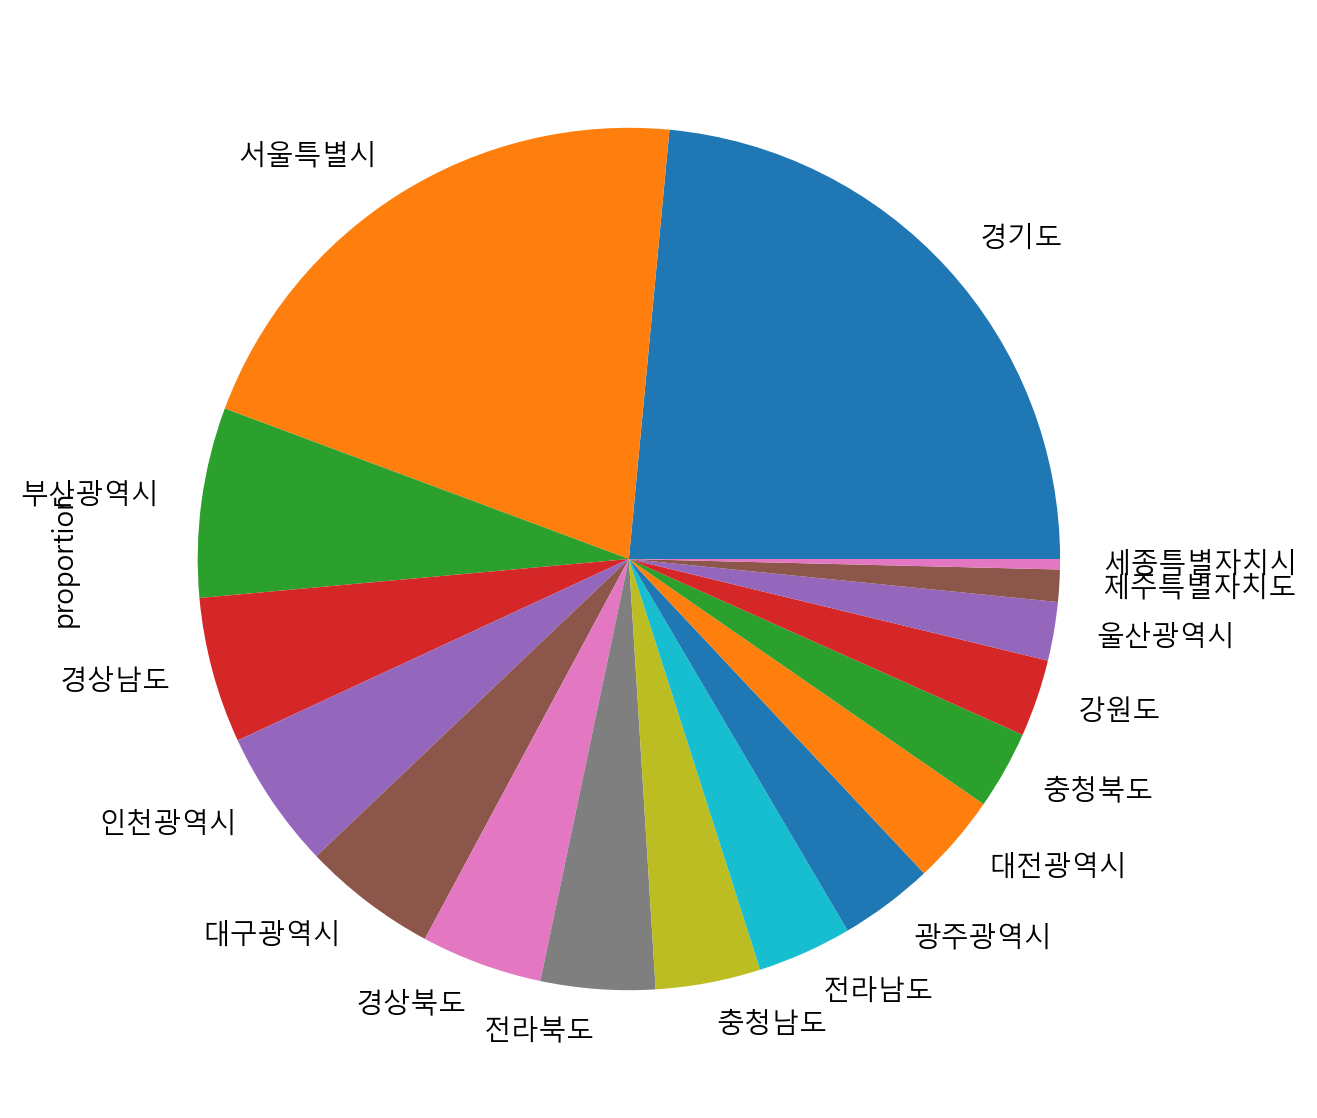

In [40]:
# figsize= 글자가 겹치지 않겠끔
city_normalize.plot.pie(figsize=(7, 7))

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='count', ylabel='시도명'>

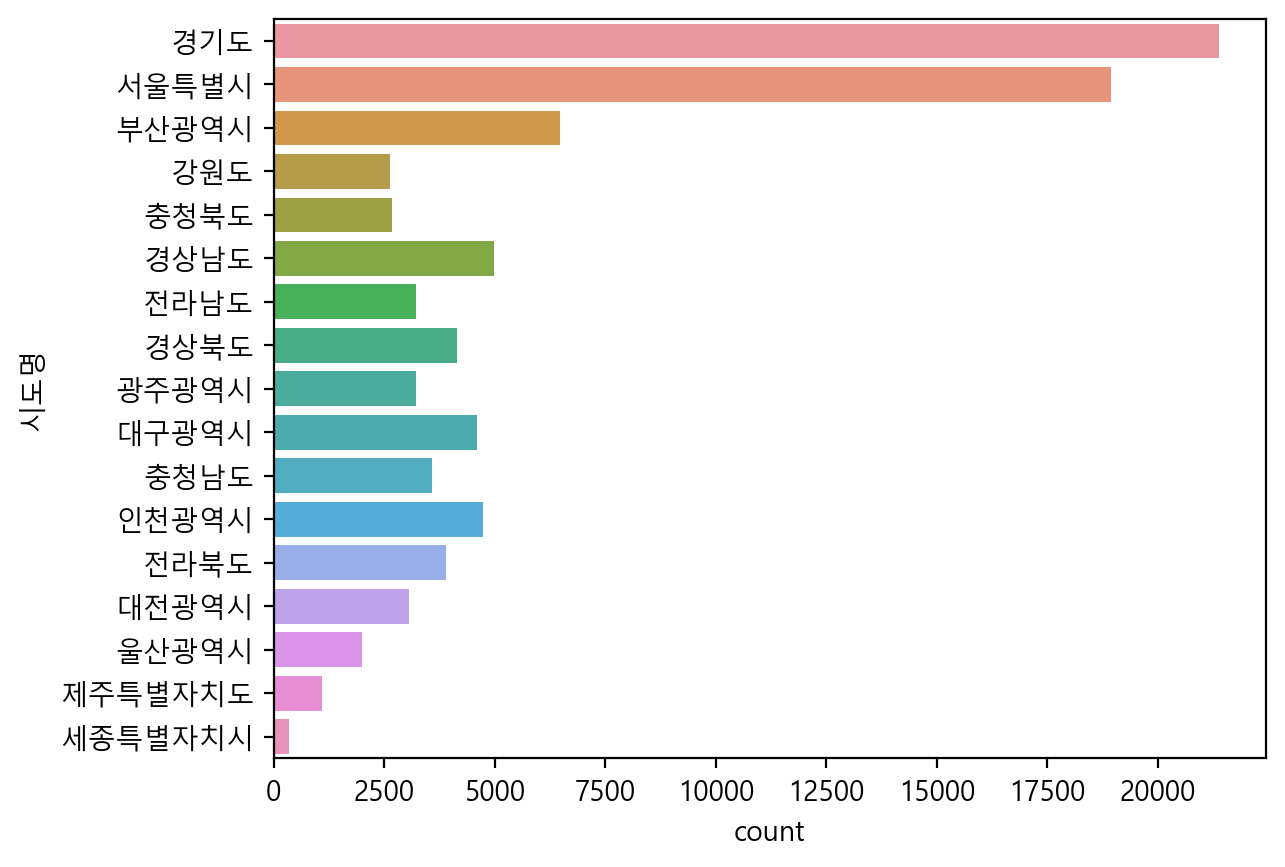

In [41]:
sns.countplot(data=df, y="시도명")

### 그래프로 그리는 데이터 가공하기

In [42]:
c = df["상권업종중분류명"].value_counts()

In [43]:
n = df["상권업종중분류명"].value_counts(normalize=True)

<Axes: xlabel='상권업종중분류명'>

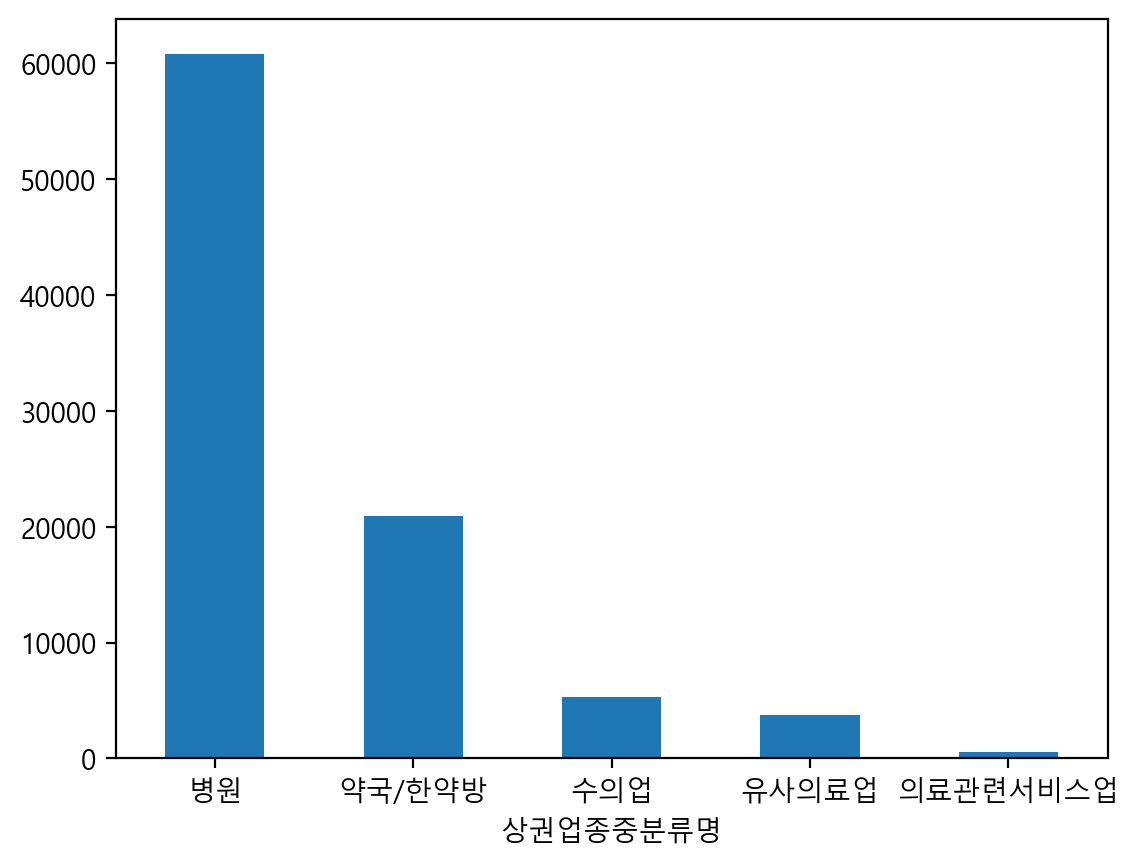

In [44]:
# rot
c.plot.bar(rot=0)

<Axes: ylabel='proportion'>

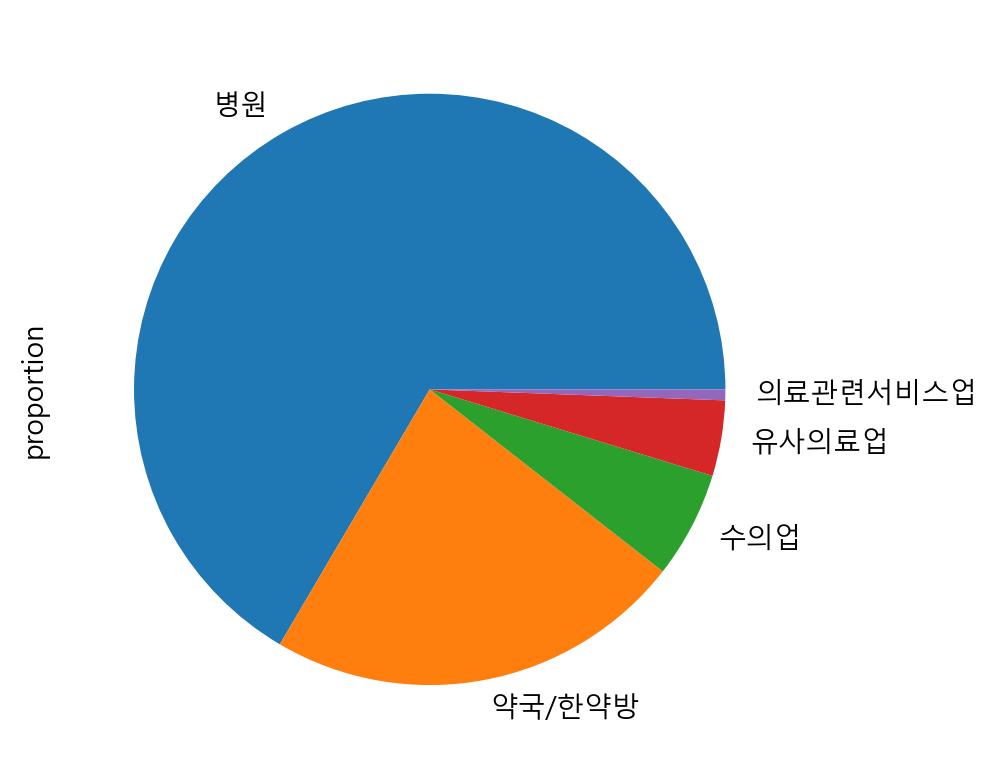

In [45]:
n.plot.pie()

<Axes: xlabel='상권업종소분류명'>

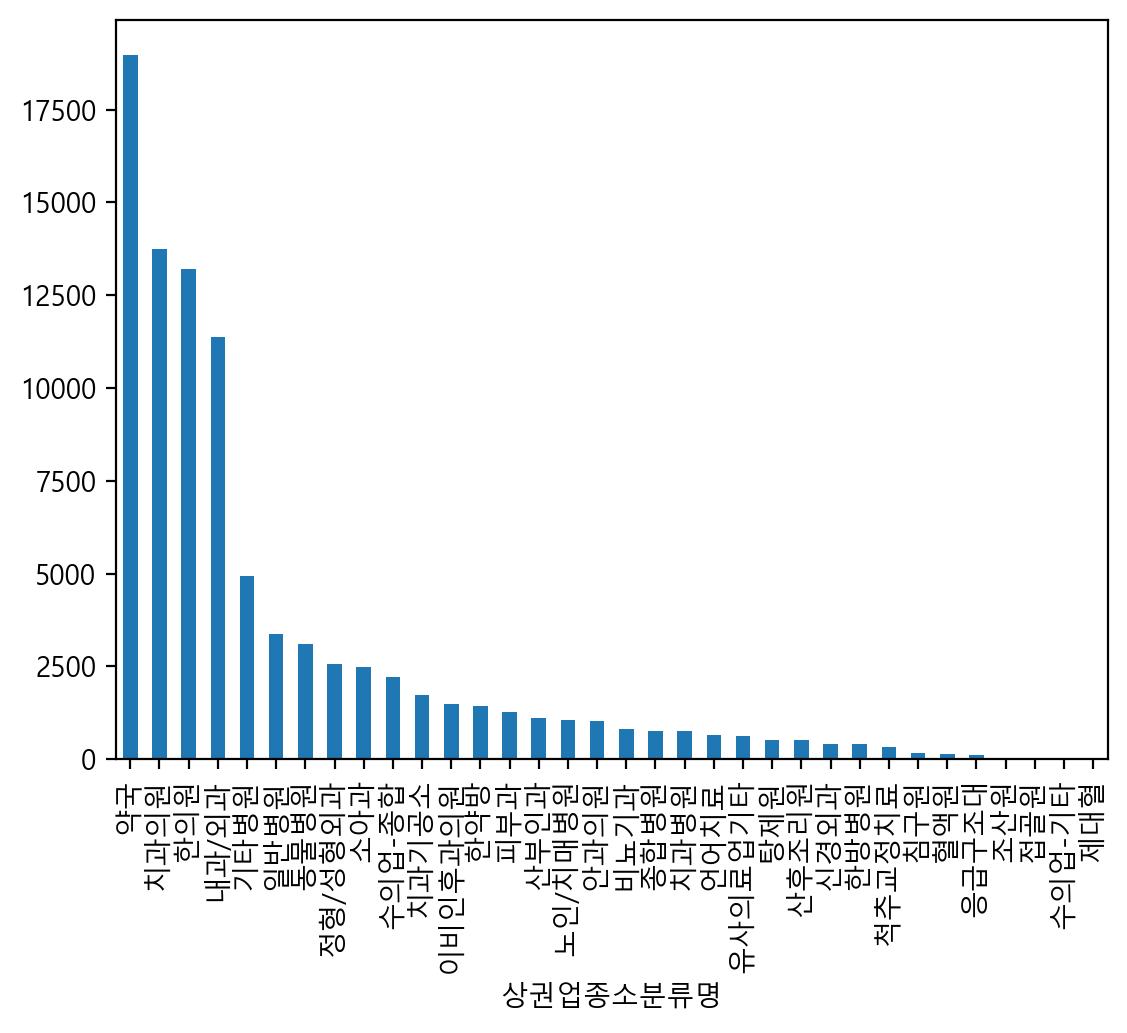

In [46]:
b = df["상권업종소분류명"].value_counts()
b.plot.bar()

<Axes: ylabel='상권업종소분류명'>

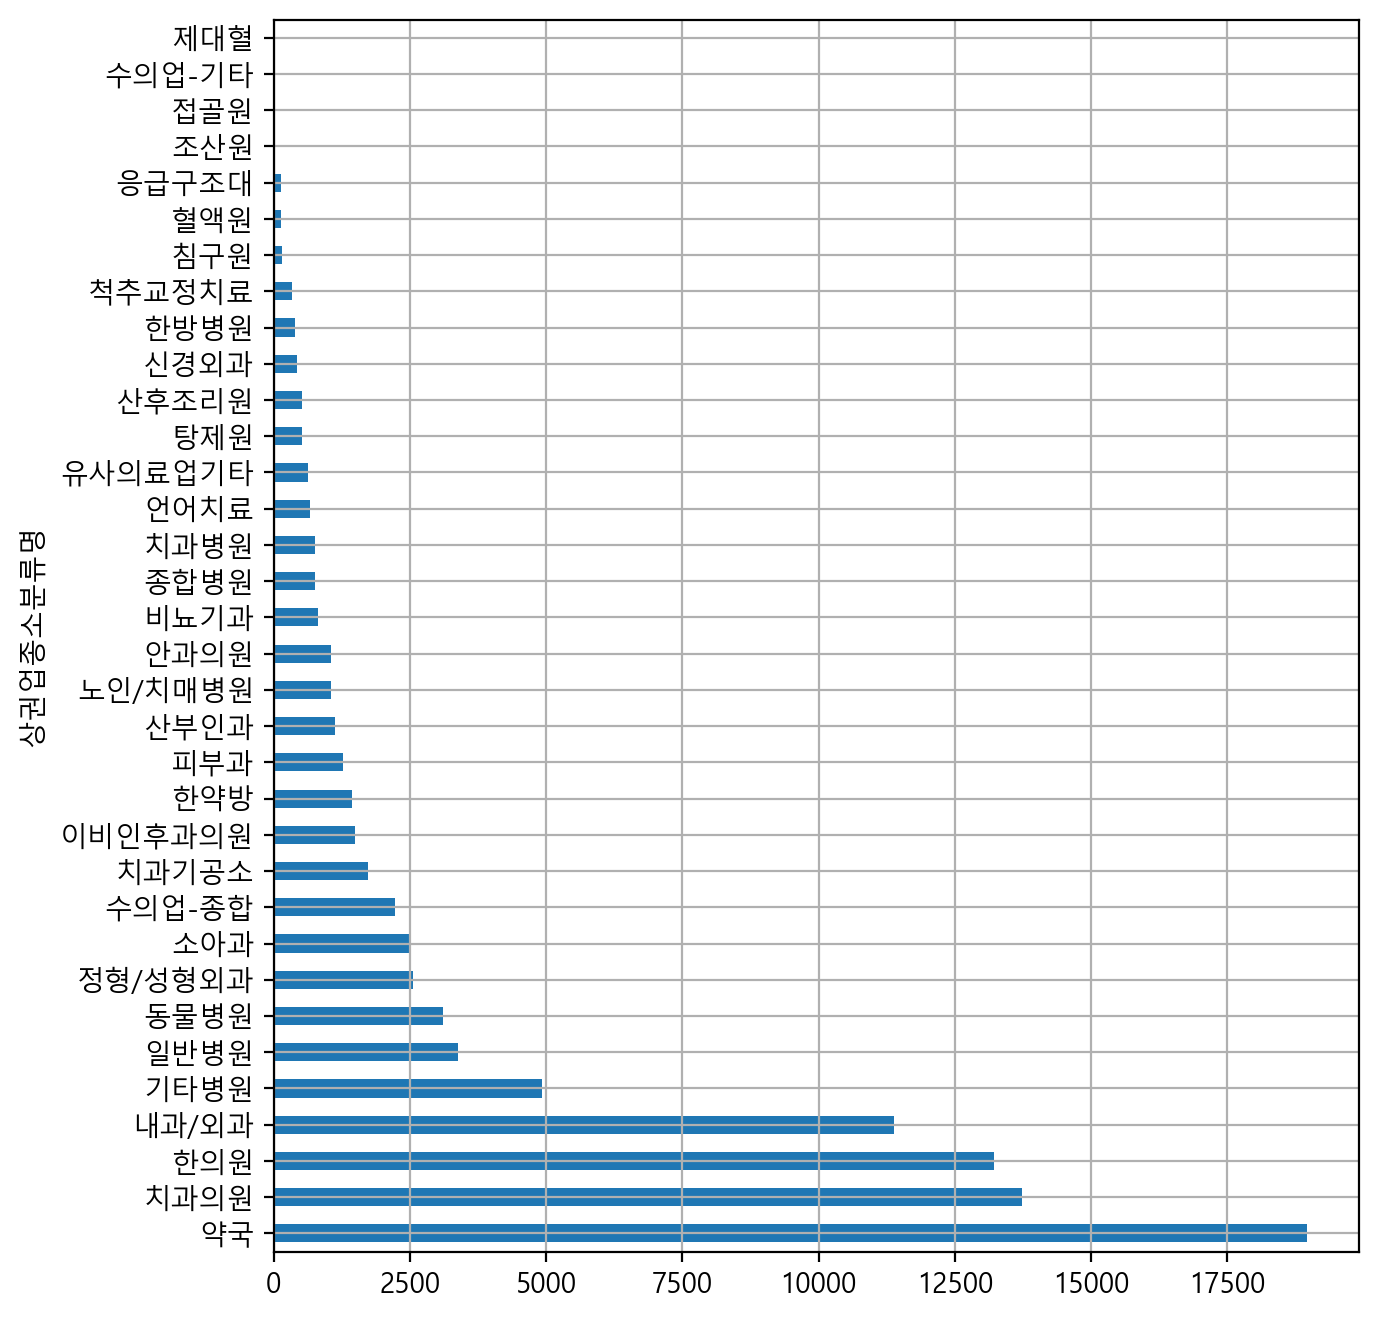

In [47]:
# figsize 글자간격, grid 그리드 부여
b.plot.barh(figsize=(7,8), grid=True)

## 데이터 색인하기
- 특정 데이터만 모아서 따로 보기

In [48]:
# # "상권업종중분류명"이 "약국/한약방"인 데이터만 가져오기
df_medical = df[df["상권업종중분류명"] == "약국/한약방"]
df_medical.head(1)

상가업소번호        상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
4  20364049  더블유스토어수지점         S       의료       S02   약국/한약방    S02A01   

  상권업종소분류명  시도명    시군구코드  ...                    지번주소         도로명코드  \
4       약국  경기도  41465.0  ...  경기도 용인시 수지구 풍덕천동 712-2  4.150000e+11   

               도로명  건물본번지        건물관리번호               도로명주소     구우편번호  \
4  경기도 용인시 수지구 문정로     32  4.150000e+24  경기도 용인시 수지구 문정로 32  448170.0   

     신우편번호          경도         위도  
4  16837.0  127.095522  37.323528  

[1 rows x 29 columns]

In [49]:
# "상권업종대분류명" 에서 "의료"만 가져오기
# df.loc를 사용하면 행,열을 함께 가져올 수 있음, "상권업종중분류명" 만 가져오기
# value_counts 를 통해 중분류의 갯수를 세기
shop_type = df["상권업종대분류명"] == "의료"
df.loc[shop_type, "상권업종중분류명"].value_counts()

상권업종중분류명
병원          60774
약국/한약방      20923
수의업          5323
유사의료업        3774
의료관련서비스업      541
Name: count, dtype: int64

In [50]:
# df.loc[df["상권업종대분류명"] == "의료", "상권업종중분류명"].value_counts()

In [51]:
# 유사의료업만 
df_medi = df[df["상권업종중분류명"] == "유사의료업"]
df_medi.shape

(3774, 29)

In [52]:
# 상호명을 그룹화, 상위 10개를 출력
df["상호명"].value_counts().head(10)

상호명
리원       152
온누리약국    149
경희한의원    141
우리약국     119
중앙약국     111
전자담배      98
조은약국      95
건강약국      87
제일약국      79
사랑약국      73
Name: count, dtype: int64

In [53]:
# 유사의료업에서 상위 10개를 출력
df_medi["상호명"].value_counts().head(10)

상호명
리원          32
고려수지침       22
대한적십자사      17
헌혈의집        12
고려수지침학회     10
수치과기공소      10
제일치과기공소      9
미소치과기공소      8
아트치과기공소      8
이사랑치과기공소     8
Name: count, dtype: int64

## 여러 조건으로 색인하기
- and == &, or == |

### 구별로 약국이 몇개가 있는지 갯수, 비율, 시각화 하기

In [54]:
# "상권업종소분류명"이 "약국" 과 "시도명" 이 "서울특별시"인 데이터만 출력
df_seoul_drug = df[
    (df["상권업종소분류명"] == "약국") & 
    (df["시도명"]== "서울특별시")]
df_seoul_drug.head(1)

상가업소번호    상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드 상권업종소분류명  \
33  20816709  이즈타워약         S       의료       S02   약국/한약방    S02A01       약국   

      시도명    시군구코드  ...               지번주소         도로명코드             도로명  \
33  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 821  1.170000e+11  서울특별시 강남구 테헤란로   

    건물본번지        건물관리번호               도로명주소     구우편번호   신우편번호          경도  \
33    101  1.170000e+24  서울특별시 강남구 테헤란로 101  135080.0  6134.0  127.028023   

           위도  
33  37.498656  

[1 rows x 29 columns]

In [55]:
# 구별로 약국이 몇개가 있는지 확인해 봅니다.
df_seoul_drug["시군구명"].value_counts()

시군구명
강남구     374
동대문구    261
광진구     212
서초구     191
송파구     188
노원구     169
성북구     160
은평구     151
영등포구    145
강서구     136
마포구     136
중랑구     129
서대문구    120
관악구     118
강동구     117
종로구     111
양천구     109
중구      106
강북구     104
구로구     102
동작구      96
성동구      88
용산구      87
금천구      85
도봉구      84
Name: count, dtype: int64

In [56]:
# 비율 확인
df_seoul_drug["시군구명"].value_counts(normalize=True)

시군구명
강남구     0.104498
동대문구    0.072925
광진구     0.059234
서초구     0.053367
송파구     0.052529
노원구     0.047220
성북구     0.044705
은평구     0.042191
영등포구    0.040514
강서구     0.037999
마포구     0.037999
중랑구     0.036044
서대문구    0.033529
관악구     0.032970
강동구     0.032691
종로구     0.031014
양천구     0.030455
중구      0.029617
강북구     0.029058
구로구     0.028500
동작구     0.026823
성동구     0.024588
용산구     0.024308
금천구     0.023750
도봉구     0.023470
Name: proportion, dtype: float64

<Axes: xlabel='시군구명'>

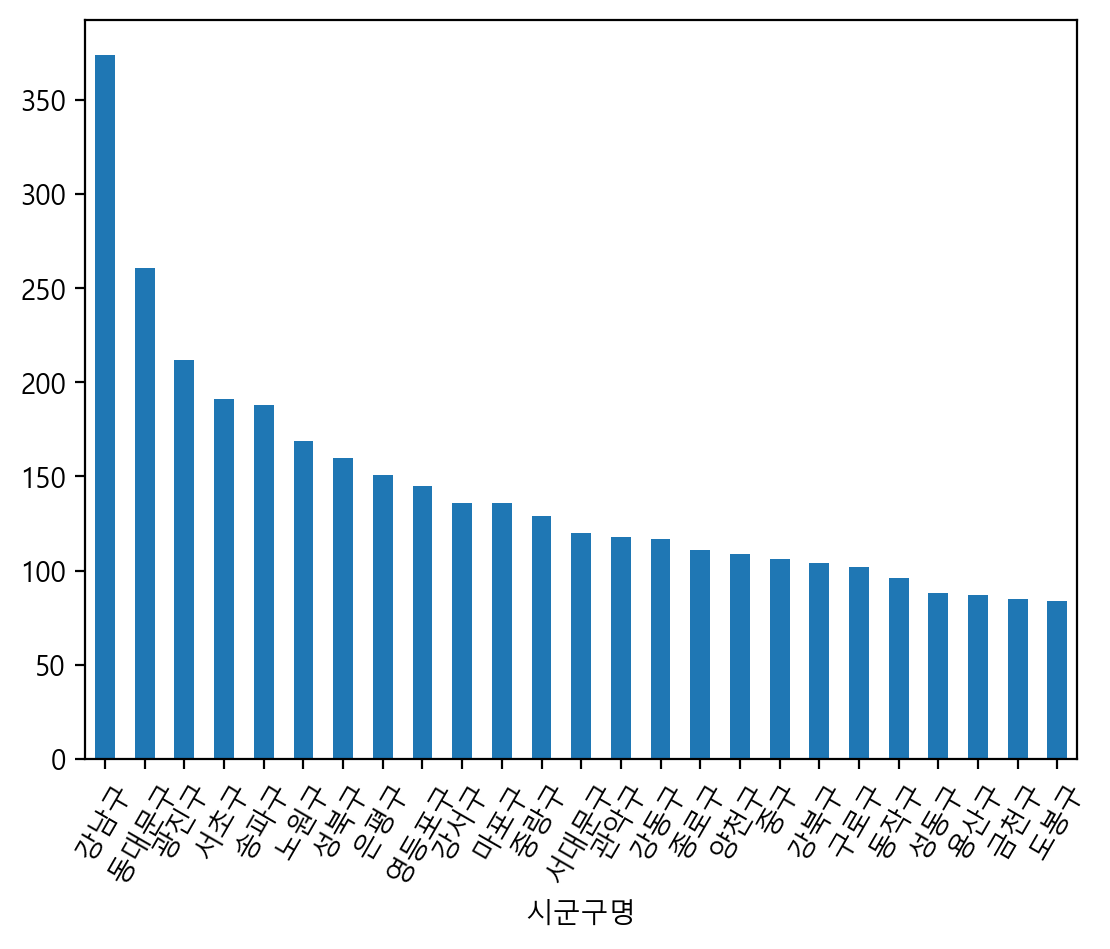

In [57]:
df_seoul_drug["시군구명"].value_counts().plot.bar(rot=60)

### 구별로 종합병원의 수, 비율, 시각화 하기 

In [58]:
# "상권업종소분류명"이 "종합병원" 과 "시도명" 이 "서울특별시"인 데이터 출력
df_seoul_hospital = df[
    (df["상권업종소분류명"] == "종합병원") & 
    (df["시도명"]== "서울특별시")]
df_seoul_hospital.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   

    상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
305     종합병원  서울특별시  11215.0  ...  서울특별시 광진구 중곡동 58-25  1.120000e+11   

                도로명  건물본번지        건물관리번호               도로명주소     구우편번호  \
305  서울특별시 광진구 긴고랑로    119  1.120000e+24  서울특별시 광진구 긴고랑로 119  143220.0   

      신우편번호          경도         위도  
305  4944.0  127.088279  37.559048  

[1 rows x 29 columns]

In [59]:
# 구별로 종합병원의 수
df_seoul_hospital["시군구명"].value_counts()

시군구명
강남구     15
영등포구     8
광진구      6
서초구      6
강동구      5
중구       5
송파구      5
강북구      4
도봉구      4
서대문구     4
양천구      4
성북구      3
강서구      2
중랑구      2
종로구      2
동대문구     2
구로구      2
노원구      2
금천구      2
성동구      2
관악구      2
동작구      1
마포구      1
용산구      1
은평구      1
Name: count, dtype: int64

## 텍스트 데이터 색인하기

In [60]:
# 상호명중에 종합병원이 아닌 데이터를 찾기
df_seoul_hospital[-df_seoul_hospital['상호명'].str.contains("종합병원")]
#df_seoul_hospital[-df_seoul_hospital['상호명'].str.contains("종합병원"), '상호명'].unique()

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
305    25155642            대진의료재단         S       의료       S01       병원   
353    20471487            홍익병원별관         S       의료       S01       병원   
385    20737057              SNUH         S       의료       S01       병원   
1917   23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   
2461   20024045                한양         S       의료       S01       병원   
...         ...               ...       ...      ...       ...      ...   
71991  28505952      서울성모병원응급의료센터         S       의료       S01       병원   
76508  12292992             라마르의원         S       의료       S01       병원   
90492  16031909     가톨릭대학교여의도성모병원         S       의료       S01       병원   
90581  16332576              씨엠병원         S       의료       S01       병원   
90788  16162338            성베드로병원         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                  지번주소  \
305      S01B01     종합병원  서울특별시  11215.0  ...   서울특별시 광진구 중곡동 58-25   
353      S01B01     종합병원  서울특별시  11470.0  ...  서울특별시 양천구 신정동 897-13   
385      S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 역삼동 736-55   
1917     S01B01     종합병원  서울특별시  11560.0  ...    서울특별시 영등포구 여의도동 62   
2461     S01B01     종합병원  서울특별시  11200.0  ...    서울특별시 성동구 행당동 15-1   
...         ...      ...    ...      ...  ...                   ...   
71991    S01B01     종합병원  서울특별시  11650.0  ...     서울특별시 서초구 반포동 505   
76508    S01B01     종합병원  서울특별시  11740.0  ...   서울특별시 강동구 천호동 453-8   
90492    S01B01     종합병원  서울특별시  11140.0  ...     서울특별시 중구 명동2가 1-1   
90581    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 영등포동4가 90   
90788    S01B01     종합병원  서울특별시  11680.0  ...  서울특별시 강남구 도곡동 910-27   

              도로명코드                 도로명  건물본번지        건물관리번호  \
305    1.120000e+11      서울특별시 광진구 긴고랑로    119  1.120000e+24   
353    1.150000e+11      서울특별시 양천구 국회대로    250  1.150000e+24   
385    1.170000e+11   서울특별시 강남구 테헤란로26길     10  1.170000e+24   
1917   1.160000e+11      서울특별시 영등포구 63로     10  1.160000e+24   
2461   1.120000e+11       서울특별시 성동구 마조로     22  1.120000e+24   
...             ...                 ...    ...           ...   
71991  1.170000e+11      서울특별시 서초구 반포대로    222  1.170000e+24   
76508  1.170000e+11  서울특별시 강동구 천호대로157길     18  1.170000e+24   
90492  1.110000e+11        서울특별시 중구 명동길     74  1.110000e+24   
90581  1.160000e+11  서울특별시 영등포구 영등포로36길     13  1.160000e+24   
90788  1.170000e+11     서울특별시 강남구 남부순환로   2649  1.170000e+24   

                       도로명주소     구우편번호   신우편번호          경도         위도  
305       서울특별시 광진구 긴고랑로 119  143220.0  4944.0  127.088279  37.559048  
353       서울특별시 양천구 국회대로 250  158070.0  7937.0  126.862805  37.529213  
385     서울특별시 강남구 테헤란로26길 10  135080.0  6236.0  127.035825  37.499630  
1917       서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  
2461      서울특별시 성동구 마조로 22-2  133070.0  4763.0  127.041325  37.559469  
...                      ...       ...     ...         ...        ...  
71991     서울특별시 서초구 반포대로 222  137701.0  6591.0  127.005841  37.502382  
76508  서울특별시 강동구 천호대로157길 18  134864.0  5335.0  127.127466  37.538485  
90492        서울특별시 중구 명동길 74  100809.0  4537.0  126.986758  37.563662  
90581  서울특별시 영등포구 영등포로36길 13  150030.0  7301.0  126.903857  37.518807  
90788   서울특별시 강남구 남부순환로 2649  135859.0  6271.0  127.039567  37.485604  

[91 rows x 29 columns]

In [61]:
# 특정 단어가 들어가는 데이터만 출력
df_seoul_hospital[df_seoul_hospital['상호명'].str.contains('의료기')]

상가업소번호               상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917  23210677  평화드림여의도성모병원의료기매장         S       의료       S01       병원   

     상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                지번주소  \
1917    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 여의도동 62   

             도로명코드             도로명  건물본번지        건물관리번호              도로명주소  \
1917  1.160000e+11  서울특별시 영등포구 63로     10  1.160000e+24  서울특별시 영등포구 63로 10   

         구우편번호   신우편번호          경도         위도  
1917  150713.0  7345.0  126.936693  37.518296  

[1 rows x 29 columns]

In [62]:
df_seoul_hospital[
df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")]

상가업소번호                상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명  \
1917   23210677   평화드림여의도성모병원의료기매장         S       의료       S01       병원   
2803   20895655      서울성모병원장례식장꽃배달         S       의료       S01       병원   
4431   21781516       알콜중독및정신질환상담소         S       의료       S01       병원   
4644   22020310      강남성모병원장례식장꽃배달         S       의료       S01       병원   
7938   20625484          원자력병원장례식장         S       의료       S01       병원   
10283  20024377          삼성의료원장례식장         S       의료       S01       병원   
47008  21738670   가톨릭대학교성바오로병원장례식장         S       의료       S01       병원   
60645  27670796         서울성모병원어린이집         S       의료       S01       병원   
70177  11537223  한림대학교부속한강성심병원장례식장         S       의료       S01       병원   

      상권업종소분류코드 상권업종소분류명    시도명    시군구코드  ...                      지번주소  \
1917     S01B01     종합병원  서울특별시  11560.0  ...        서울특별시 영등포구 여의도동 62   
2803     S01B01     종합병원  서울특별시  11650.0  ...         서울특별시 서초구 반포동 551   
4431     S01B01     종합병원  서울특별시  11320.0  ...       서울특별시 도봉구 창동 181-52   
4644     S01B01     종합병원  서울특별시  11650.0  ...       서울특별시 서초구 반포동 547-6   
7938     S01B01     종합병원  서울특별시  11350.0  ...       서울특별시 노원구 공릉동 215-4   
10283    S01B01     종합병원  서울특별시  11680.0  ...          서울특별시 강남구 일원동 50   
47008    S01B01     종합병원  서울특별시  11230.0  ...     서울특별시 동대문구 전농동 620-56   
60645    S01B01     종합병원  서울특별시  11650.0  ...         서울특별시 서초구 반포동 505   
70177    S01B01     종합병원  서울특별시  11560.0  ...  서울특별시 영등포구 영등포동7가 94-200   

              도로명코드                 도로명  건물본번지        건물관리번호  \
1917   1.160000e+11      서울특별시 영등포구 63로     10  1.160000e+24   
2803   1.170000e+11   서울특별시 서초구 사평대로28길     55  1.170000e+24   
4431   1.130000e+11    서울특별시 도봉구 마들로13길    153  1.130000e+24   
4644   1.170000e+11   서울특별시 서초구 반포대로39길     56  1.170000e+24   
7938   1.140000e+11       서울특별시 노원구 노원로     75  1.140000e+24   
10283  1.170000e+11       서울특별시 강남구 일원로     81  1.170000e+24   
47008  1.120000e+11      서울특별시 동대문구 왕산로    180  1.120000e+24   
60645  1.170000e+11      서울특별시 서초구 반포대로    222  1.170000e+24   
70177  1.160000e+11  서울특별시 영등포구 버드나루로7길     12  1.160000e+24   

                         도로명주소     구우편번호   신우편번호          경도         위도  
1917         서울특별시 영등포구 63로 10  150713.0  7345.0  126.936693  37.518296  
2803      서울특별시 서초구 사평대로28길 55  137040.0  6578.0  127.000682  37.498257  
4431      서울특별시 도봉구 마들로13길 153  132040.0  1411.0  127.046203  37.657046  
4644   서울특별시 서초구 반포대로39길 56-24  137040.0  6578.0  127.001756  37.499095  
7938          서울특별시 노원구 노원로 75  139706.0  1812.0  127.082670  37.628808  
10283         서울특별시 강남구 일원로 81  135710.0  6351.0  127.089579  37.490334  
47008       서울특별시 동대문구 왕산로 180  130709.0  2559.0  127.043471  37.579246  
60645       서울특별시 서초구 반포대로 222  137701.0  6591.0  127.005841  37.502382  
70177    서울특별시 영등포구 버드나루로7길 12  150030.0  7247.0  126.909676  37.523168  

[9 rows x 29 columns]

In [63]:
# 꽃배달|의료기|장례식장|상담소|어린이집은 종합병원과 무관하기 때문에 전처리를 위해 해당 텍스트 한번에 검색
# 제거할 인덱스만 drop_row에 담아주고 list 형채로 변환
drop_row = df_seoul_hospital[
df_seoul_hospital["상호명"].str.contains("꽃배달|의료기|장례식장|상담소|어린이집")].index

drop_row = drop_row.tolist()
drop_row

[1917, 2803, 4431, 4644, 7938, 10283, 47008, 60645, 70177]

In [64]:
# 의원으로 끝나는 데이터도 종합변원으로 볼수 없기 때문에 인덱스를 찾아 list 형태로 변환
drop_row2 = df_seoul_hospital[df_seoul_hospital["상호명"].str.endswith('의원')].index
drop_row2 = drop_row2.tolist()
drop_row2

[8479,
 12854,
 13715,
 14966,
 16091,
 18047,
 20200,
 20415,
 30706,
 32889,
 34459,
 34720,
 35696,
 37251,
 45120,
 49626,
 51575,
 55133,
 56320,
 56404,
 56688,
 57551,
 62113,
 76508]

In [65]:
# 삭제할 행 합치기
drop_row = drop_row + drop_row2
len(drop_row)

33

In [66]:
# 해당 셀 삭제후, 삭제 전/후 비교 
print(df_seoul_hospital.shape)
df_seoul_hospital = df_seoul_hospital.drop(drop_row, axis=0) #행기준
print(df_seoul_hospital.shape)

(91, 29)
(58, 29)


<Axes: xlabel='시군구명'>

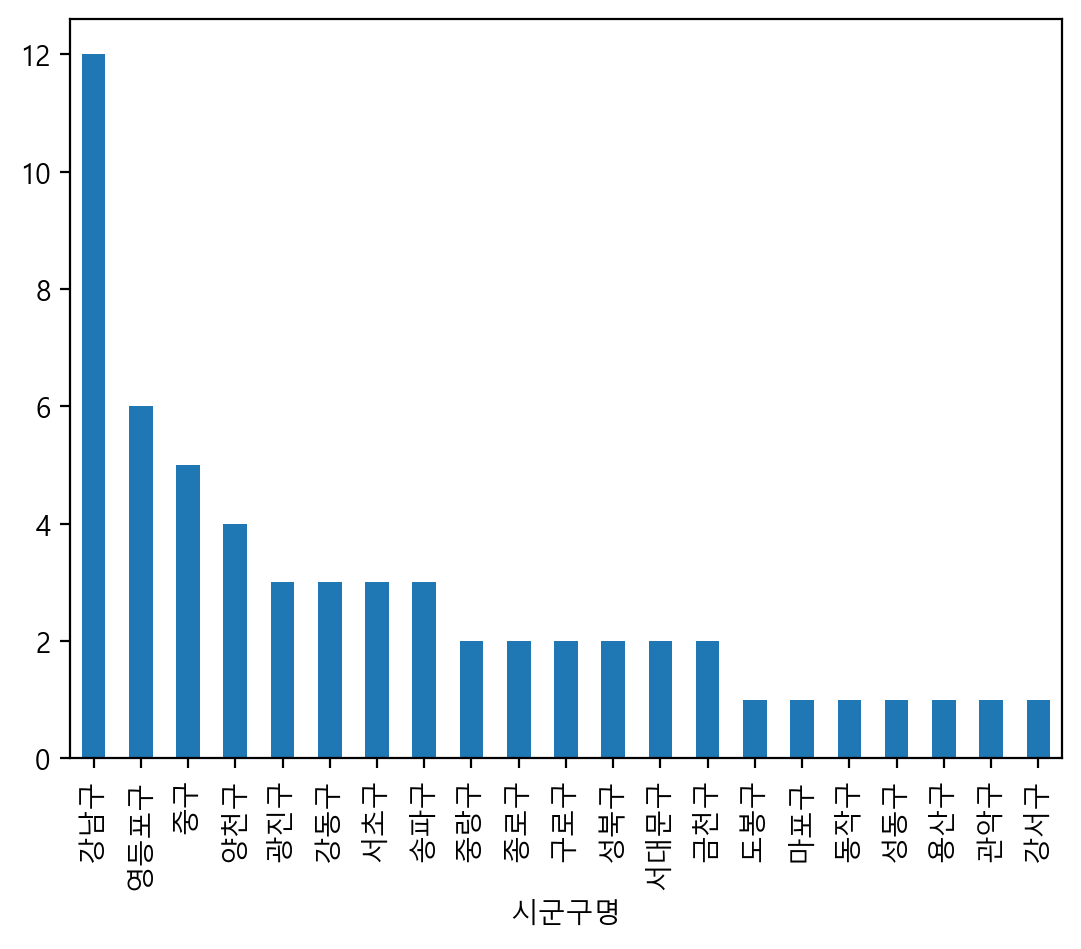

In [67]:
# 시군구명에 따라 종합병원의 숫자를 시각화
df_seoul_hospital['시군구명'].value_counts().plot.bar()

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='시군구명', ylabel='count'>

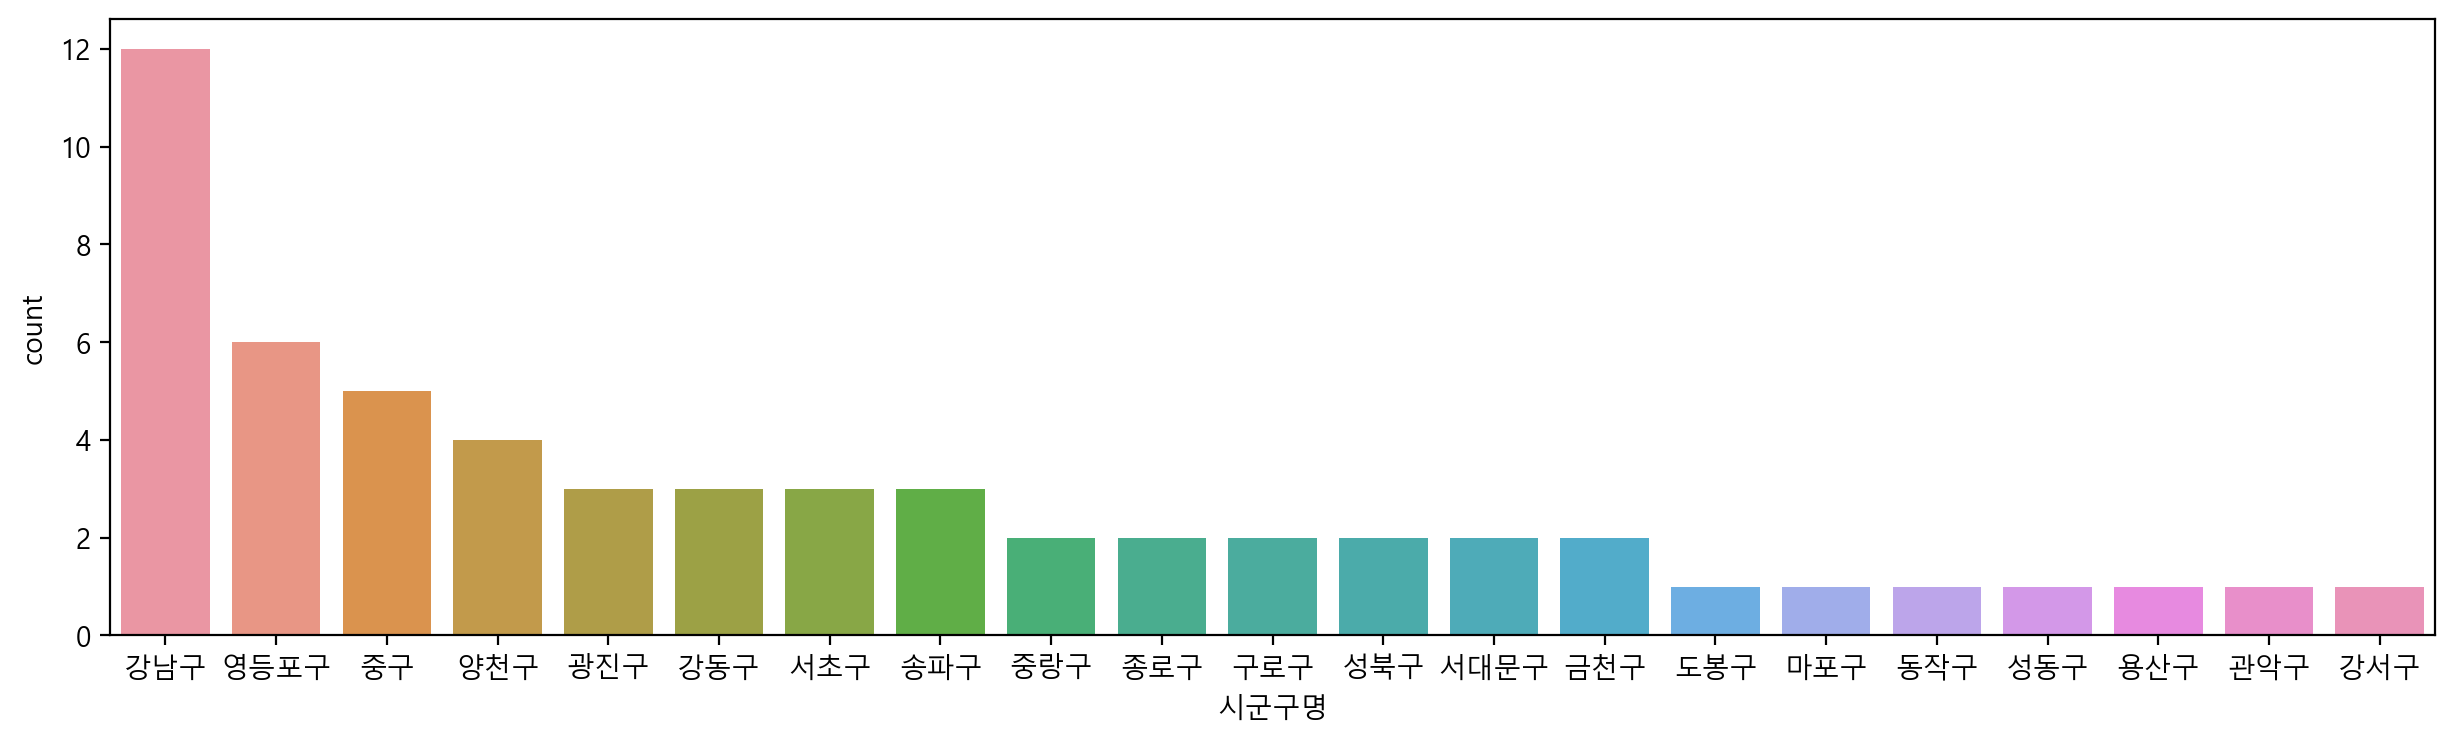

In [68]:
plt.figure(figsize=(15,4))
sns.countplot(data= df_seoul_hospital, x='시군구명',
             order=df_seoul_hospital['시군구명'].value_counts().index) # 정렬

# 강남구에 종합병원이 많은걸을 알수 있음

## 특정지역만 보기 
- 서울에 있는 데이터의 위도와 경도 보기 

In [69]:
df_seoul = df[df["시도명"] == "서울특별시"].copy()
df_seoul.shape

(18943, 29)

In [70]:
df_seoul['시군구명'].value_counts()

시군구명
강남구     3120
서초구     1491
동대문구    1152
송파구     1021
광진구      935
강서구      799
노원구      741
은평구      739
영등포구     731
성북구      708
강동구      703
마포구      649
관악구      578
중구       576
양천구      574
서대문구     543
중랑구      497
종로구      492
동작구      489
성동구      482
구로구      451
도봉구      412
강북구      396
용산구      361
금천구      303
Name: count, dtype: int64

<Axes: xlabel='시군구명'>

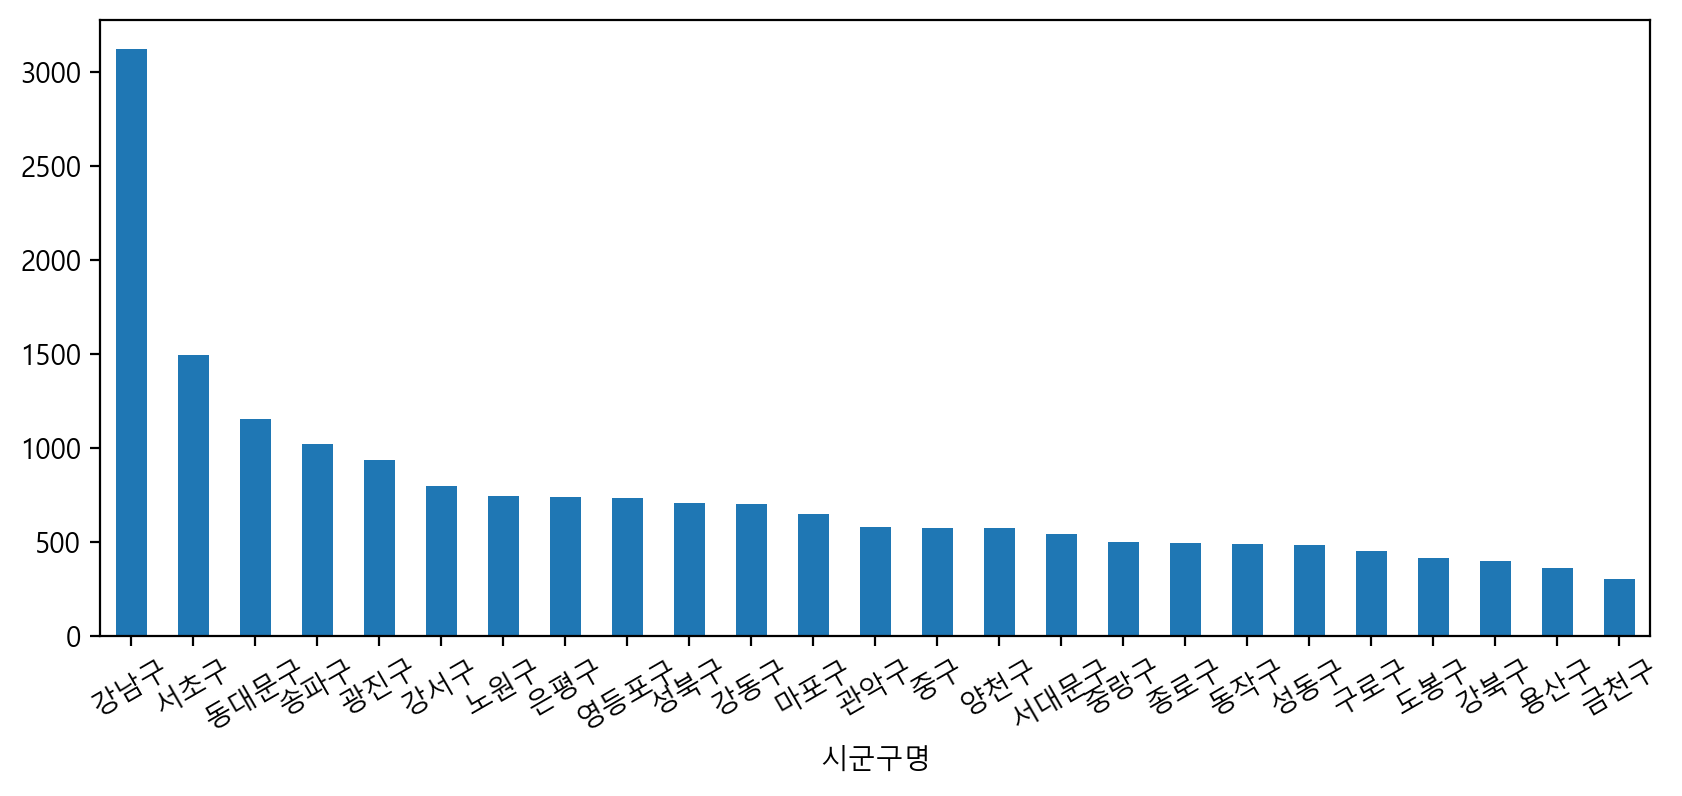

In [71]:
df_seoul['시군구명'].value_counts().plot.bar(figsize=(10,4), rot=30)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='시군구명', ylabel='count'>

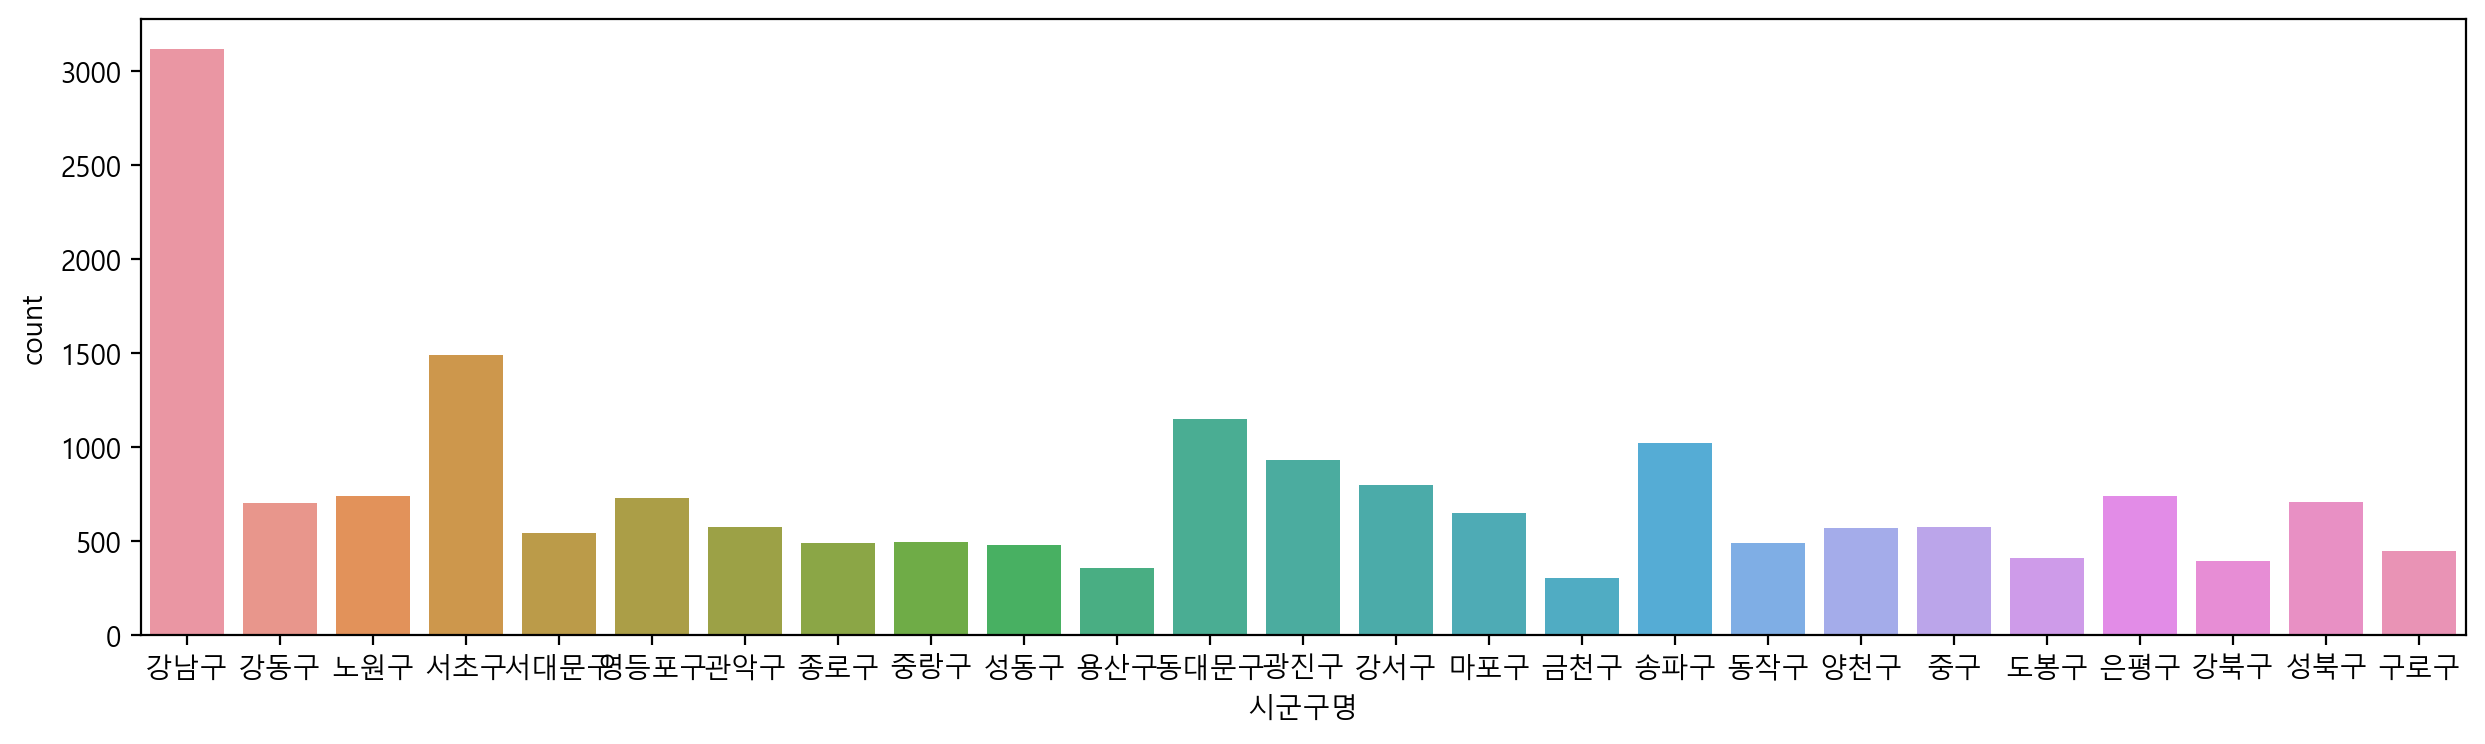

In [72]:
# 시군구명을 시각화 
plt.figure(figsize=(15, 4))
sns.countplot(data=df_seoul, x="시군구명")

<Axes: xlabel='경도', ylabel='위도'>

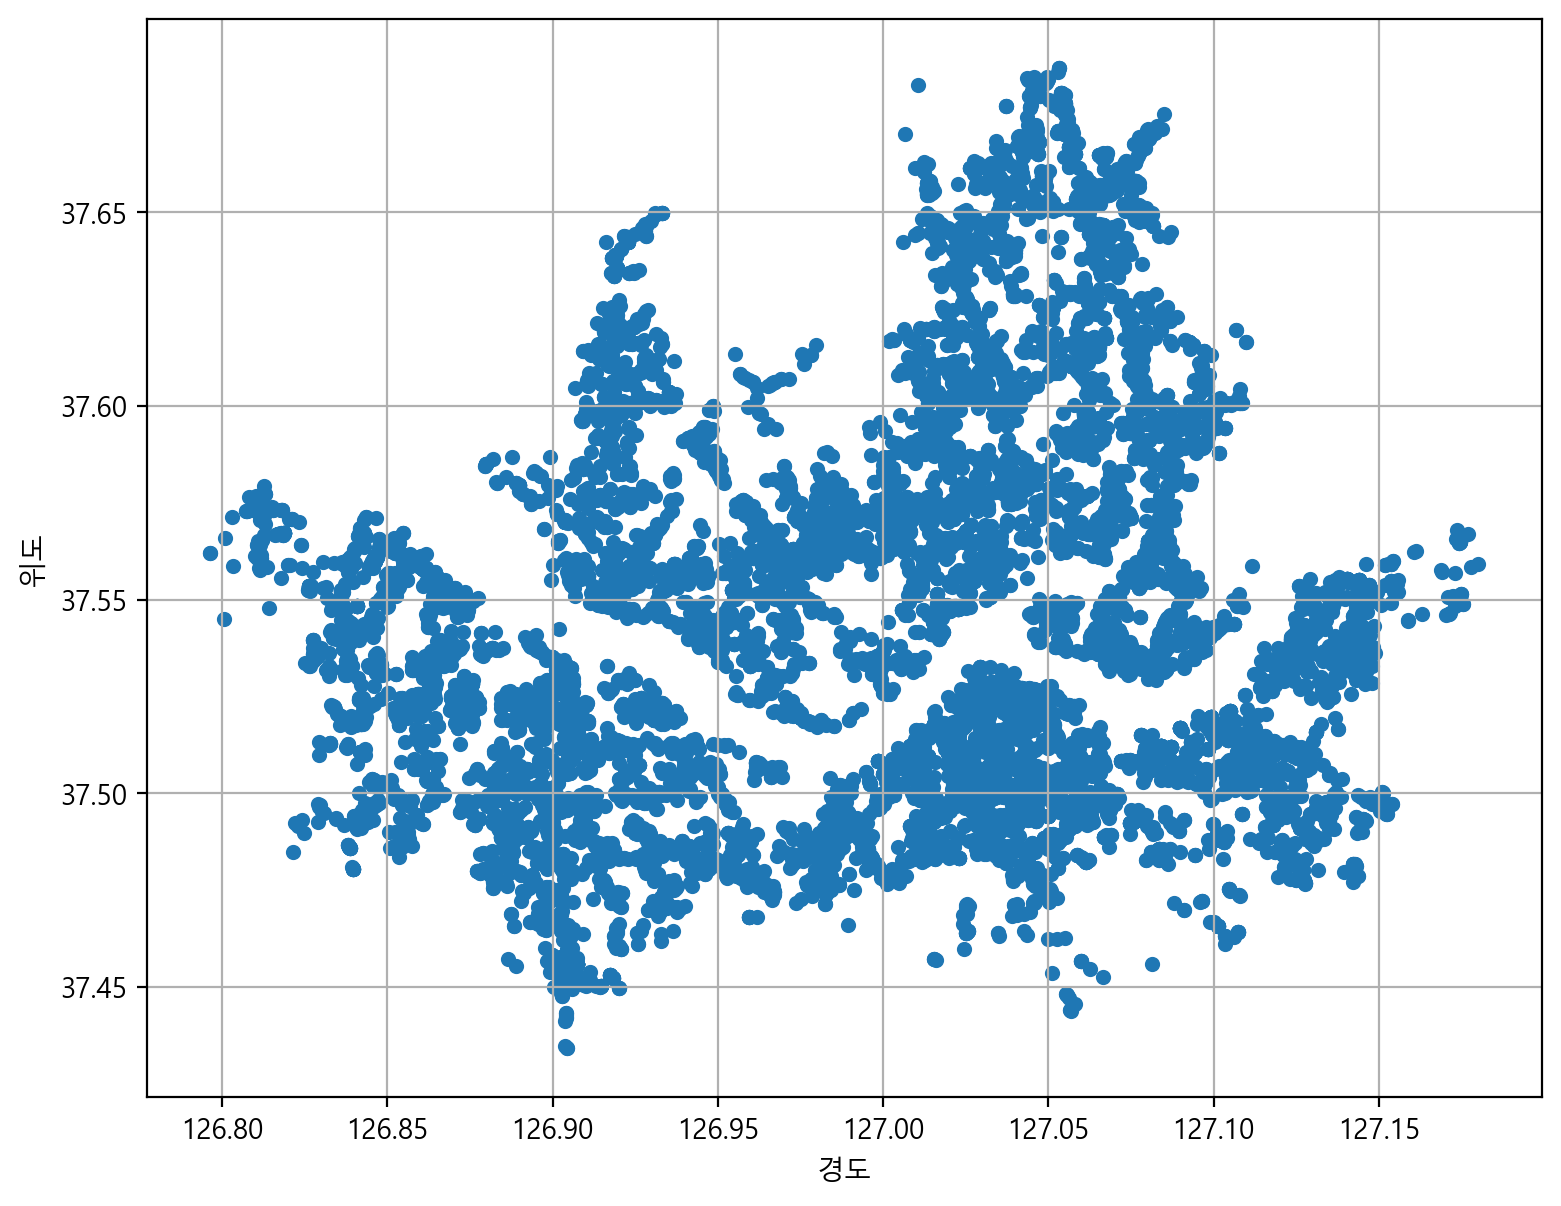

In [73]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_seoul[["경도", "위도", "시군구명"]].plot.scatter(
    x="경도", y="위도", figsize=(9, 7), grid=True)

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Axes: xlabel='경도', ylabel='위도'>

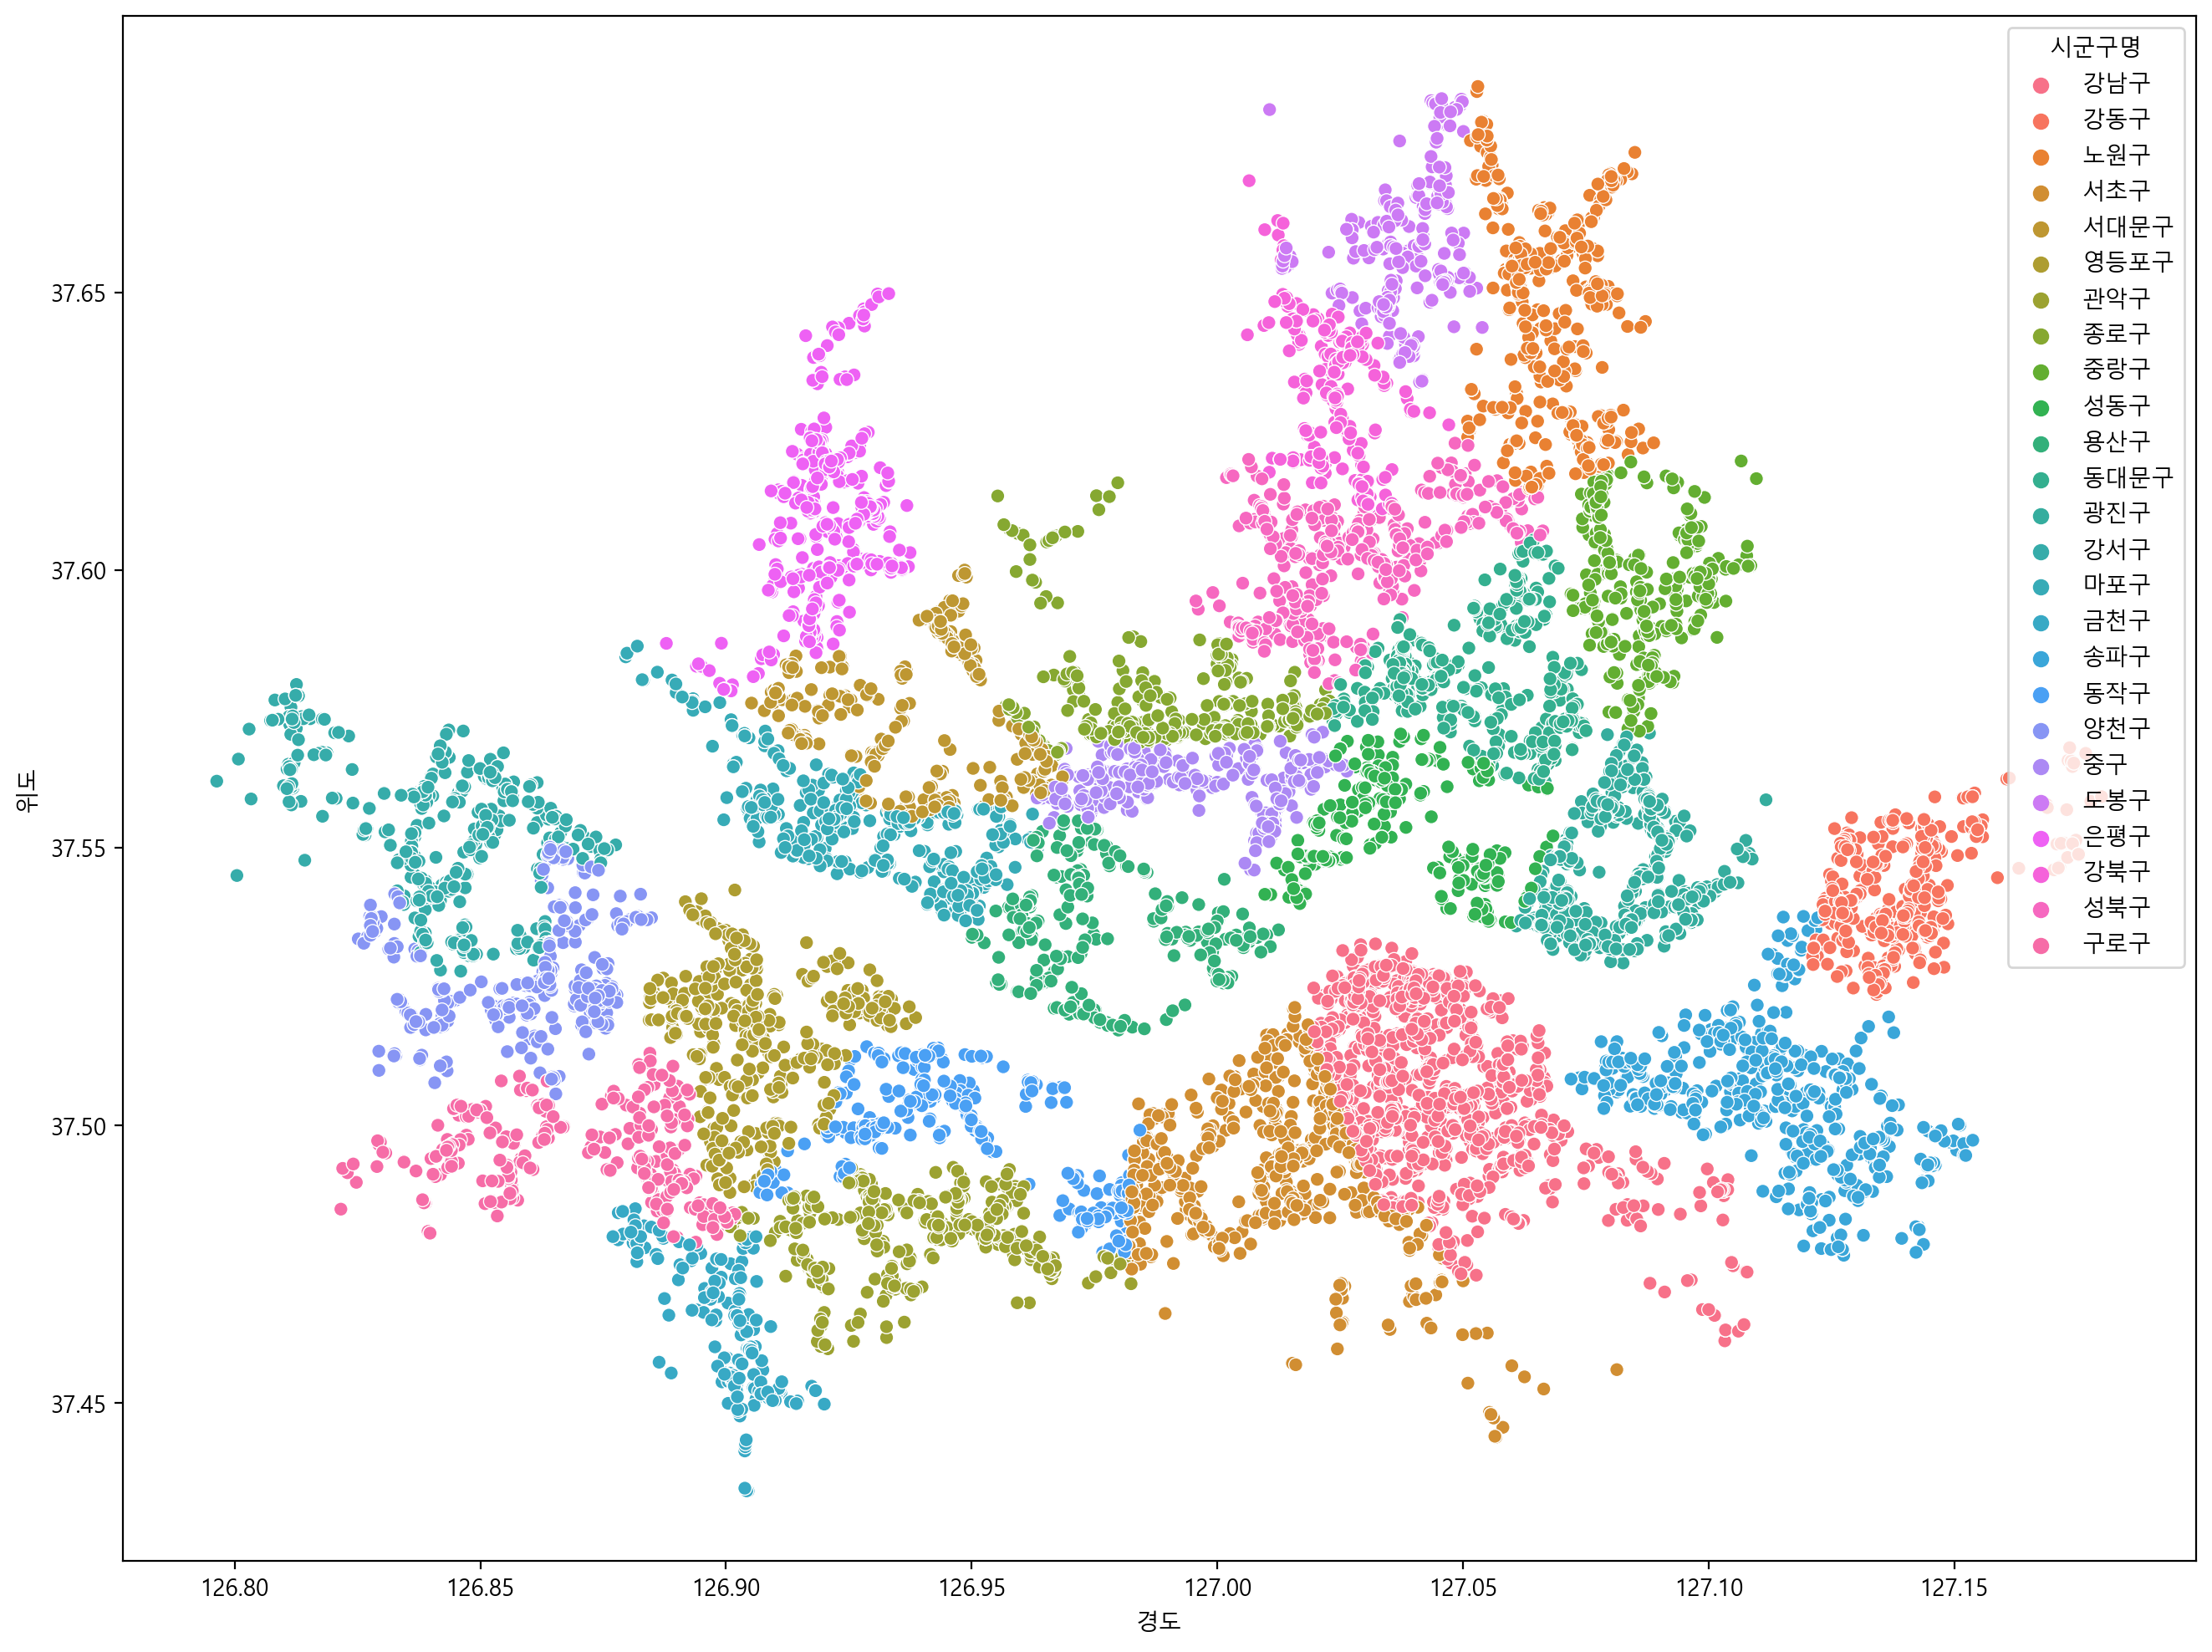

In [74]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df_seoul, 
                x='경도', y='위도', hue='시군구명') #hue = 색상

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Axes: xlabel='경도', ylabel='위도'>

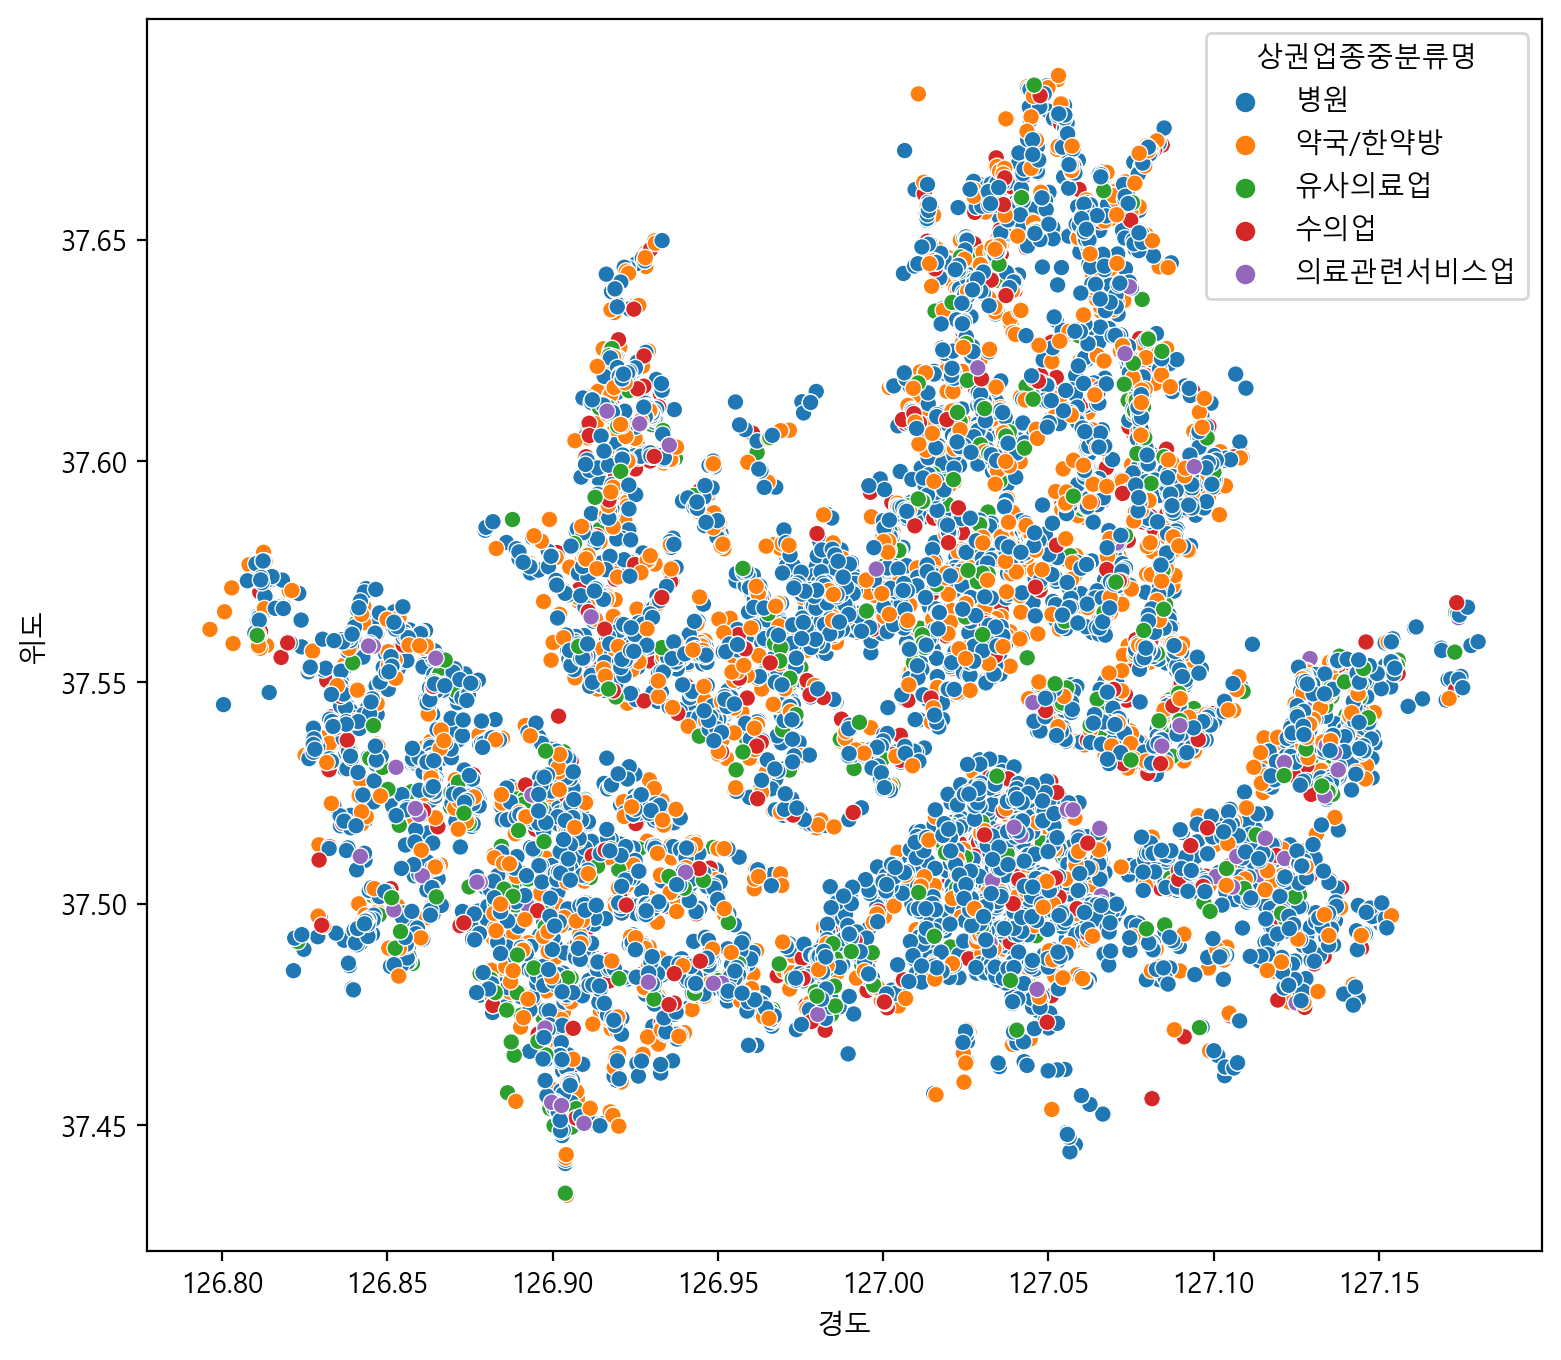

In [75]:
plt.figure(figsize=(9, 8))
sns.scatterplot(data=df_seoul, x="경도", y="위도", hue="상권업종중분류명")

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

<Axes: xlabel='경도', ylabel='위도'>

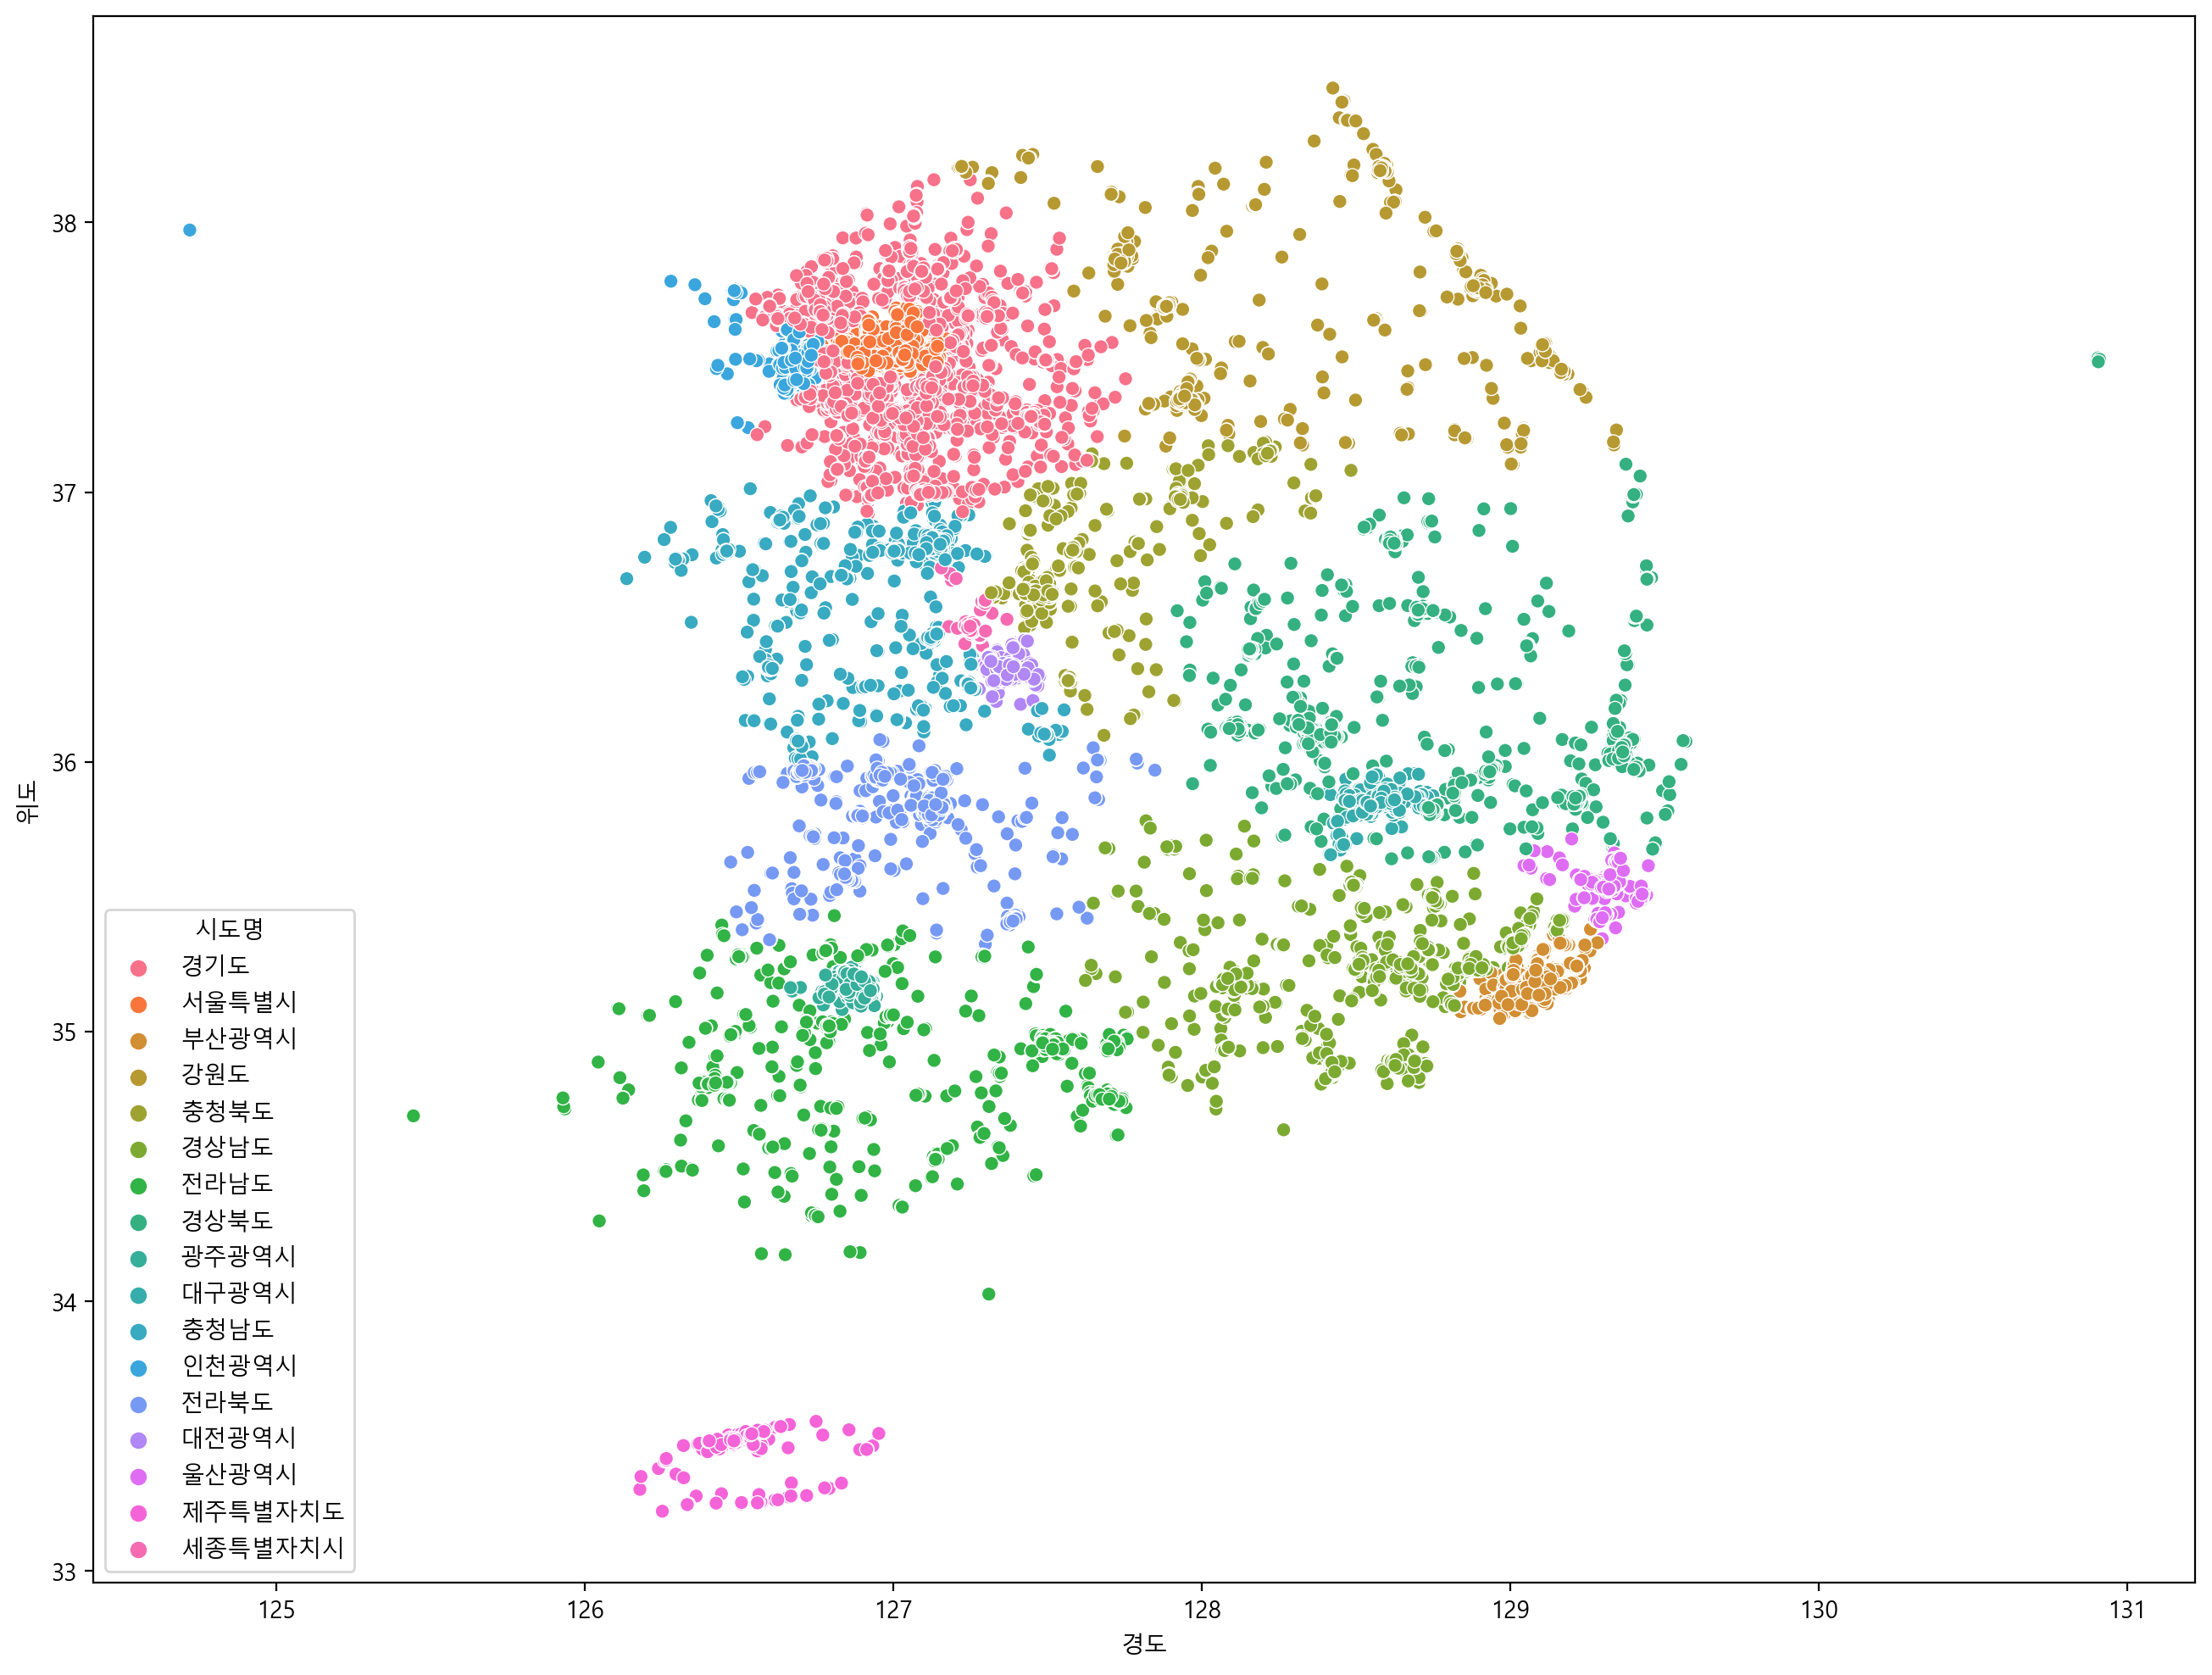

In [76]:
# 전국데이터
plt.figure(figsize=(16, 12))
sns.scatterplot(data=df, x="경도", y="위도", hue="시도명")

## Folium 으로 지도 활용하기
- Folium 사용예제
https://python-visualization.github.io/folium/latest/getting_started.html

In [77]:
# 아나콘다에서 folium 을 사용하기 위해서는 별도의 설치가 필요
# https://anaconda.org/conda-forge/folium
# conda install -c conda-forge folium 
# 지도 시각화를 위한 라이브러리

In [107]:
 # pip install folium

In [84]:
import folium #지도 시각화를 위한 라이브러리

In [89]:
m = folium.Map(location=[45.5236, -122.6750])
m

In [90]:
m.save('index.html') # 파일로 저장

In [93]:
# 지도의 중심을 지정하기 위해 위도, 경도의 평균을 구함
df_seoul_hospital['위도'].mean()
df_seoul_hospital['경도'].mean()

126.9963589362069

In [100]:
df_seoul_hospital.head(1)

상가업소번호     상호명 상권업종대분류코드 상권업종대분류명 상권업종중분류코드 상권업종중분류명 상권업종소분류코드  \
305  25155642  대진의료재단         S       의료       S01       병원    S01B01   

    상권업종소분류명    시도명    시군구코드  ...                 지번주소         도로명코드  \
305     종합병원  서울특별시  11215.0  ...  서울특별시 광진구 중곡동 58-25  1.120000e+11   

                도로명  건물본번지        건물관리번호               도로명주소     구우편번호  \
305  서울특별시 광진구 긴고랑로    119  1.120000e+24  서울특별시 광진구 긴고랑로 119  143220.0   

      신우편번호          경도         위도  
305  4944.0  127.088279  37.559048  

[1 rows x 29 columns]

In [105]:
map = folium.Map(location=[df_seoul_hospital['위도'].mean(), df_seoul_hospital['경도'].mean()],
          zoom_start=12)
# zoom_start=12 확대 

In [106]:
for n in df_seoul_hospital.index:
    name = df_seoul_hospital.loc[n, '상호명']
    address = df_seoul_hospital.loc[n, '도로명주소']
    popup = f"{name}-{address}" # 문자열 연결
    location = [df_seoul_hospital.loc[n, '위도'], df_seoul_hospital.loc[n, '경도']]
    folium.Marker(
        location = location,
        popup = popup
    ).add_to(map)
map